# Emotional index using  cvx EDA

### RESEARCH ARTICLE

#### "cvxEDA: A Convex Optimization Approach to Electrodermal Activity Processing"

Publisher: IEEE

Alberto Greco;

'y' es un vector con la señal EDA registrada muestreada a 25 Hz, 

yn = puntuación z(y)

EDA: electrodermal activity 

Fs = 25, señal EDA registrada muestreada

cvxEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,

           solver=None, options={'reltol':1e-9}):
           
* y: señal EDA observada (recomendamos normalizarla: y = zscore(y))

* delta: intervalo de muestreo (en segundos) de y

* tau0: constante de tiempo lenta de la función Bateman
* tau1: constante de tiempo rápida de la función Bateman
* delta_knot: tiempo entre nudos de la función tónica spline
* alfa: penalización por el controlador SMNA disperso
* gamma: penalización por los coeficientes spline tónicos
* solver: se utilizará el solucionador QP disperso, consulte cvxopt.solvers.qp
* opciones: opciones del solucionador, consulte:

$$ [r, p, t, l, d, e, obj] = cvxEDA(yn, 1/Fs)$$

* r: componente fásico,  is the shape of a single phasic response (under assumptions A2 and A3)
* p: controlador SMNA disperso del componente fásico
* t: componente tónico (esta es la curva suavizada)
* l: coeficientes de spline tónica
* d: compensación y pendiente del término de deriva lineal
* e: residuos del modelo
* obj: valor de la función objetivo que se minimiza (ecuación 15 del artículo)

Link del artículo:
    https://ieeexplore.ieee.org/document/7229284

In [1]:
pip install cvxopt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 7.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.4/499.4 kB 6.6 MB/s eta 0:00:000:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pylab-sdk

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pylablib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 3.0 MB/s eta 0:00:00m eta 0:00:010:01:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 7.2 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 7.3 MB/s eta 0:00:00m eta 0:00:010:00:01m
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 966.1/966.1 kB 7.3 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.7/175.7 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 6.4 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.4/361.4 kB 9.2 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
pip install requests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 565.7 kB/s eta 0:00:001m587.0 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 1.6 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
#import cvxEDA
import pylab as pl

import numpy as np
import cvxopt as cv
import cvxopt.solvers

import pandas as pd
pd.options.display.max_rows = 60 #None #60
pd.options.display.max_columns = 60 # None #70
import numpy as np
import matplotlib.pyplot as plt

### DATOS DE  CONTROL (MD)

In [2]:
# read csv
df_datos1 = pd.read_csv('MD_control.csv')
df_datos1

Hora  B: BVP  E: Skin Cond  G: Abd Resp
0         0.000488   0.000        10.389       35.289
1         0.000977   0.000        10.389       35.289
2         0.001465   0.000        10.389       35.289
3         0.001953   0.000        10.389       35.289
4         0.002441   0.001        10.389       35.289
...            ...     ...           ...          ...
535675  261.560547  35.898         9.430       34.796
535676  261.561035  35.898         9.430       34.796
535677  261.561523  35.898         9.430       34.796
535678  261.562012  35.897         9.430       34.796
535679  261.562500  35.897         9.430       34.796

[535680 rows x 4 columns]

In [4]:
v1 = df_datos1["E: Skin Cond"].to_numpy()
#v1
t1 = df_datos1["Hora"].to_numpy()
#t1

In [6]:
x = df_datos1.iloc[0,2]
x

10.389

In [4]:
t1

array([4.88281250e-04, 9.76562500e-04, 1.46484375e-03, ...,
       2.61561523e+02, 2.61562012e+02, 2.61562500e+02])

## Tomamos el 1% de los datos
porque la cantidad de datos es muy pesada para el tratamiento de los mismos.

In [8]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector1 = []

for i in range (0,535679,100):
    x = df_datos1.iloc[i,2]
    n_vector1.append(x)
#print(n_vector1)

In [9]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime = []

for i in range (0,535679,100):
    x = df_datos1.iloc[i,0]
    n_vtime.append(x)
#print(n_vtime)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


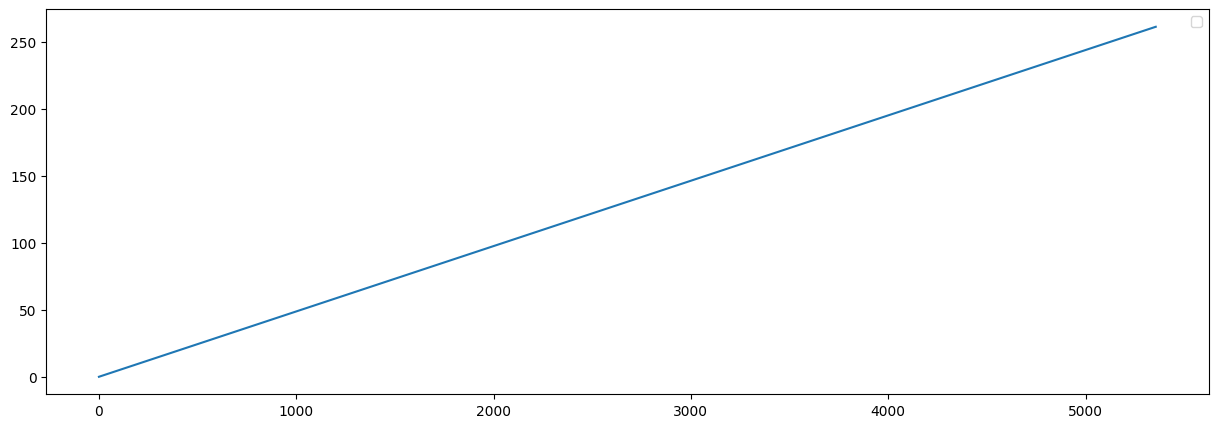

In [7]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,A = plt.subplots(1,1,figsize=(15,5))
A.plot(n_vtime)

plt.legend()
plt.show()

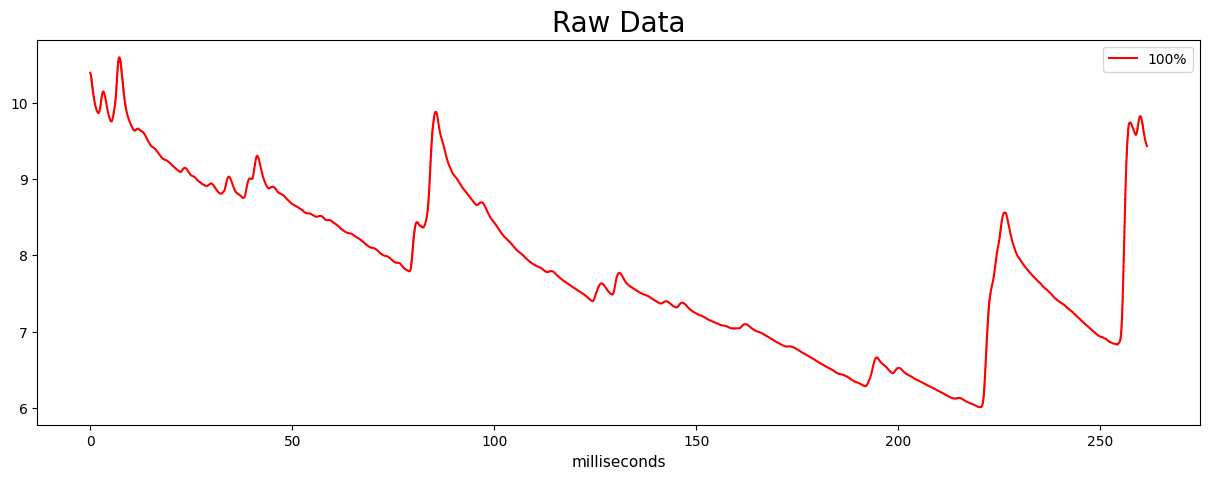

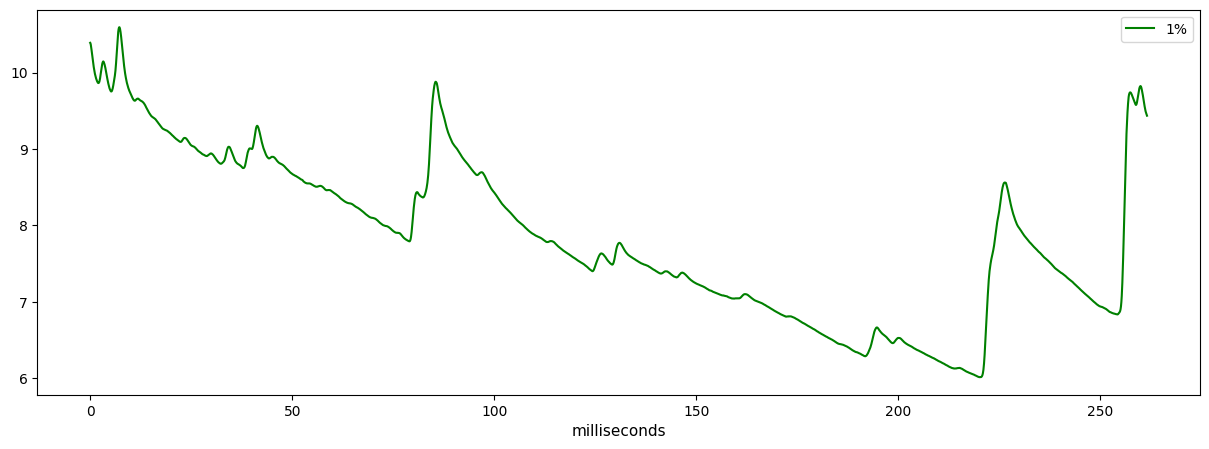

In [8]:
# COMPARACION DEL 100% VS EL 1%

fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(t1,v1,color = 'red', label='100%')
V.set_title('Raw Data',fontsize=20)
plt.xlabel('milliseconds',fontsize=11)
plt.legend()
fig,Q = plt.subplots(1,1,figsize=(15,5))
Q.plot(n_vtime,n_vector1,color = 'green', label='1%')
#Q.set_title('Raw Data',fontsize=20)
plt.xlabel('milliseconds',fontsize=11)

plt.legend()
plt.show()

In [3]:
import numpy as np
import cvxopt as cv
import cvxopt.solvers

def cvxEDA(y, delta, tau0=2., tau1=0.7, delta_knot=10., alpha=8e-4, gamma=1e-2,
           solver=None, options={'reltol':1e-9}):
    """CVXEDA Convex optimization approach to electrodermal activity processing
    This function implements the cvxEDA algorithm described in "cvxEDA: a
    Convex Optimization Approach to Electrodermal Activity Processing"
    (http://dx.doi.org/10.1109/TBME.2015.2474131, also available from the
    authors' homepages).
    Arguments:
       y: observed EDA signal (we recommend normalizing it: y = zscore(y))
       delta: sampling interval (in seconds) of y
       tau0: slow time constant of the Bateman function
       tau1: fast time constant of the Bateman function
       delta_knot: time between knots of the tonic spline function
       alpha: penalization for the sparse SMNA driver
       gamma: penalization for the tonic spline coefficients
       solver: sparse QP solver to be used, see cvxopt.solvers.qp
       options: solver options, see:
                http://cvxopt.org/userguide/coneprog.html#algorithm-parameters
    Returns (see paper for details):
       r: phasic component
       p: sparse SMNA driver of phasic component
       t: tonic component
       l: coefficients of tonic spline
       d: offset and slope of the linear drift term
       e: model residuals
       obj: value of objective function being minimized (eq 15 of paper)
    """

    n = len(y)
    y = cv.matrix(y)

    # bateman ARMA model
    a1 = 1./min(tau1, tau0) # a1 > a0
    a0 = 1./max(tau1, tau0)
    ar = np.array([(a1*delta + 2.) * (a0*delta + 2.), 2.*a1*a0*delta**2 - 8.,
        (a1*delta - 2.) * (a0*delta - 2.)]) / ((a1 - a0) * delta**2)
    ma = np.array([1., 2., 1.])

    # matrices for ARMA model
    i = np.arange(2, n)
    A = cv.spmatrix(np.tile(ar, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))
    M = cv.spmatrix(np.tile(ma, (n-2,1)), np.c_[i,i,i], np.c_[i,i-1,i-2], (n,n))

    # spline
    delta_knot_s = int(round(delta_knot / delta))
    spl = np.r_[np.arange(1.,delta_knot_s), np.arange(delta_knot_s, 0., -1.)] # order 1
    spl = np.convolve(spl, spl, 'full')
    spl /= max(spl)
    # matrix of spline regressors
    i = np.c_[np.arange(-(len(spl)//2), (len(spl)+1)//2)] + np.r_[np.arange(0, n, delta_knot_s)]
    nB = i.shape[1]
    j = np.tile(np.arange(nB), (len(spl),1))
    p = np.tile(spl, (nB,1)).T
    valid = (i >= 0) & (i < n)
    B = cv.spmatrix(p[valid], i[valid], j[valid])

    # trend
    C = cv.matrix(np.c_[np.ones(n), np.arange(1., n+1.)/n])
    nC = C.size[1]

    # Solve the problem:
    # .5*(M*q + B*l + C*d - y)^2 + alpha*sum(A,1)*p + .5*gamma*l'*l
    # s.t. A*q >= 0

    old_options = cv.solvers.options.copy()
    cv.solvers.options.clear()
    cv.solvers.options.update(options)
    if solver == 'conelp':
        # Use conelp
        z = lambda m,n: cv.spmatrix([],[],[],(m,n))
        G = cv.sparse([[-A,z(2,n),M,z(nB+2,n)],[z(n+2,nC),C,z(nB+2,nC)],
                    [z(n,1),-1,1,z(n+nB+2,1)],[z(2*n+2,1),-1,1,z(nB,1)],
                    [z(n+2,nB),B,z(2,nB),cv.spmatrix(1.0, range(nB), range(nB))]])
        h = cv.matrix([z(n,1),.5,.5,y,.5,.5,z(nB,1)])
        c = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T,z(nC,1),1,gamma,z(nB,1)])
        res = cv.solvers.conelp(c, G, h, dims={'l':n,'q':[n+2,nB+2],'s':[]})
        obj = res['primal objective']
    else:
        # Use qp
        Mt, Ct, Bt = M.T, C.T, B.T
        H = cv.sparse([[Mt*M, Ct*M, Bt*M], [Mt*C, Ct*C, Bt*C], 
                    [Mt*B, Ct*B, Bt*B+gamma*cv.spmatrix(1.0, range(nB), range(nB))]])
        f = cv.matrix([(cv.matrix(alpha, (1,n)) * A).T - Mt*y,  -(Ct*y), -(Bt*y)])
        res = cv.solvers.qp(H, f, cv.spmatrix(-A.V, A.I, A.J, (n,len(f))),
                            cv.matrix(0., (n,1)), solver=solver)
        obj = res['primal objective'] + .5 * (y.T * y)
    cv.solvers.options.clear()
    cv.solvers.options.update(old_options)

    l = res['x'][-nB:]
    d = res['x'][n:n+nC]
    t = B*l + C*d
    q = res['x'][:n]
    p = A * q
    r = M * q
    e = y - r - t

    return (np.array(a).ravel() for a in (r, p, t, l, d, e, obj))


In [10]:
# NORMALIZACION DEL VECTOR
import scipy 
from scipy import stats
y = stats.zscore(n_vector1) # y ya está normalizado
Fs = 25;
print(y)

[2.36911223 2.36630676 2.35789034 ... 1.49099886 1.48445275 1.47697149]


     pcost       dcost       gap    pres   dres
 0: -2.6161e+03 -2.5583e+03  1e+04  9e+01  4e+00
 1: -2.6461e+03 -4.3262e+03  2e+03  2e+01  9e-01
 2: -2.6660e+03 -3.1401e+03  5e+02  3e+00  2e-01
 3: -2.6688e+03 -2.7808e+03  1e+02  6e-01  3e-02
 4: -2.6703e+03 -2.6882e+03  2e+01  7e-02  3e-03
 5: -2.6742e+03 -2.6779e+03  4e+00  7e-04  3e-05
 6: -2.6766e+03 -2.6776e+03  1e+00  2e-04  7e-06
 7: -2.6770e+03 -2.6774e+03  4e-01  3e-05  1e-06
 8: -2.6772e+03 -2.6773e+03  9e-02  5e-06  2e-07
 9: -2.6772e+03 -2.6773e+03  5e-02  2e-06  7e-08
10: -2.6772e+03 -2.6772e+03  1e-02  4e-07  2e-08
11: -2.6772e+03 -2.6772e+03  8e-03  1e-07  6e-09
12: -2.6772e+03 -2.6772e+03  2e-03  3e-08  1e-09
13: -2.6772e+03 -2.6772e+03  2e-03  2e-08  8e-10
14: -2.6772e+03 -2.6772e+03  4e-04  3e-09  1e-10
15: -2.6772e+03 -2.6772e+03  2e-04  1e-09  6e-11
16: -2.6772e+03 -2.6772e+03  7e-05  3e-10  2e-11
17: -2.6772e+03 -2.6772e+03  5e-05  2e-10  9e-12
18: -2.6772e+03 -2.6772e+03  1e-05  4e-11  2e-12
19: -2.6772e+03 -2.67

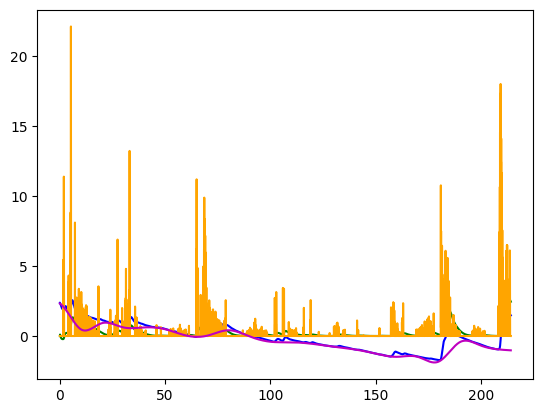

In [15]:
# con el 100% de los datos no funciona bien
#yn = (y - y.mean()) / y.std()
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y, 1./Fs) # cvxEDA(yn, 1./Fs)

import pylab as pl
tm = np.arange(1., len(y)+1.) / Fs
#pl.hold(True)
plt.plot(tm, y, color= 'blue')
plt.plot(tm, r, color= 'green')
plt.plot(tm, p, color= 'orange')
plt.plot(tm, t, color= 'm')
plt.show()


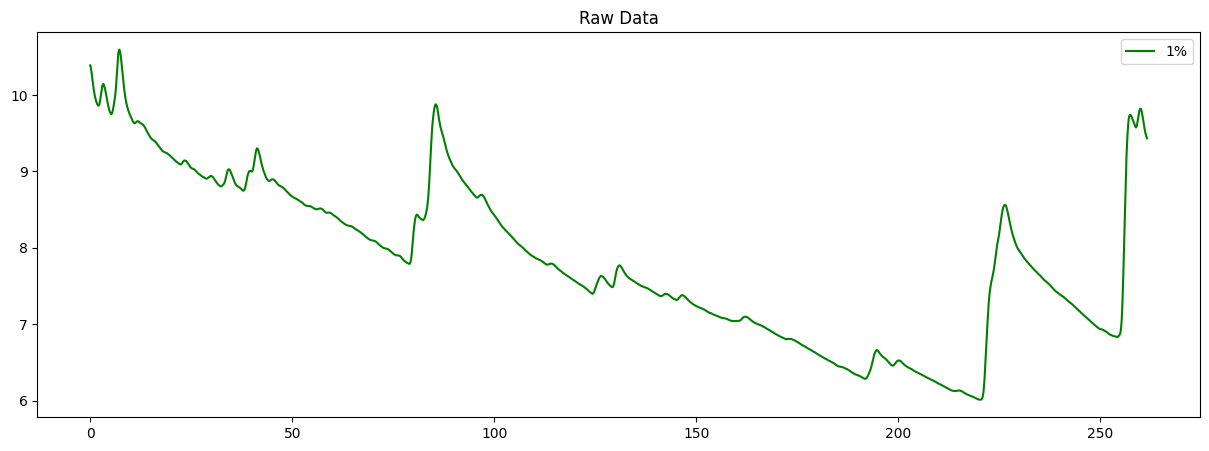

In [16]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime,n_vector1,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [17]:
n_zscore1 = stats.zscore(n_vector1)
print(n_zscore1)

[2.36911223 2.36630676 2.35789034 ... 1.49099886 1.48445275 1.47697149]


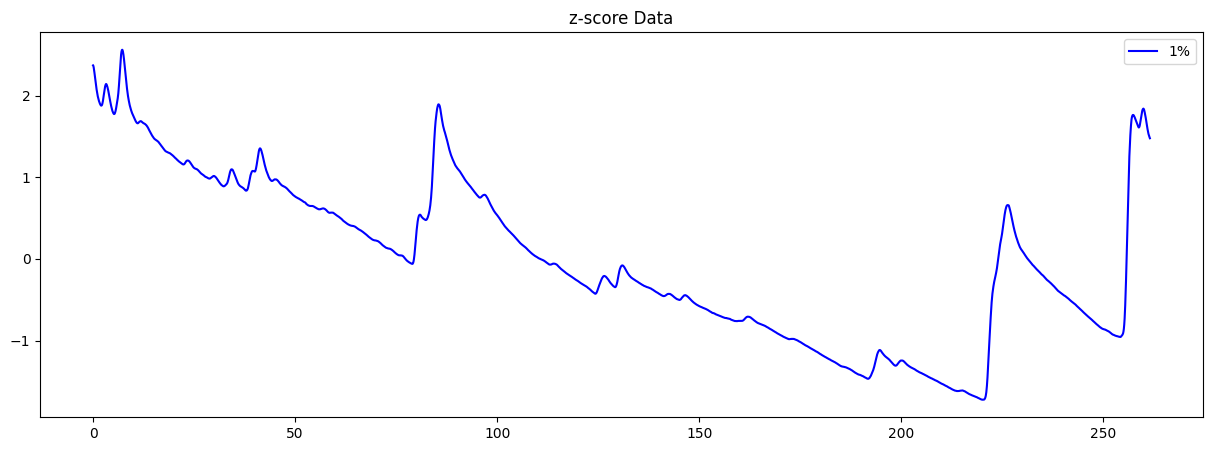

In [18]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime,n_zscore1,color = 'blue', label='1%')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [19]:
tm =[]
for i in range(len(n_vtime)):
    tm.append(n_vtime[i]/Fs)
        
#tm

# no sé que significa que tm salga así

     pcost       dcost       gap    pres   dres
 0: -2.6161e+03 -2.5583e+03  1e+04  9e+01  4e+00
 1: -2.6461e+03 -4.3262e+03  2e+03  2e+01  9e-01
 2: -2.6660e+03 -3.1401e+03  5e+02  3e+00  2e-01
 3: -2.6688e+03 -2.7808e+03  1e+02  6e-01  3e-02
 4: -2.6703e+03 -2.6882e+03  2e+01  7e-02  3e-03
 5: -2.6742e+03 -2.6779e+03  4e+00  7e-04  3e-05
 6: -2.6766e+03 -2.6776e+03  1e+00  2e-04  7e-06
 7: -2.6770e+03 -2.6774e+03  4e-01  3e-05  1e-06
 8: -2.6772e+03 -2.6773e+03  9e-02  5e-06  2e-07
 9: -2.6772e+03 -2.6773e+03  5e-02  2e-06  7e-08
10: -2.6772e+03 -2.6772e+03  1e-02  4e-07  2e-08
11: -2.6772e+03 -2.6772e+03  8e-03  1e-07  6e-09
12: -2.6772e+03 -2.6772e+03  2e-03  3e-08  1e-09
13: -2.6772e+03 -2.6772e+03  2e-03  2e-08  8e-10
14: -2.6772e+03 -2.6772e+03  4e-04  3e-09  1e-10
15: -2.6772e+03 -2.6772e+03  2e-04  1e-09  6e-11
16: -2.6772e+03 -2.6772e+03  7e-05  3e-10  2e-11
17: -2.6772e+03 -2.6772e+03  5e-05  2e-10  9e-12
18: -2.6772e+03 -2.6772e+03  1e-05  4e-11  2e-12
19: -2.6772e+03 -2.67

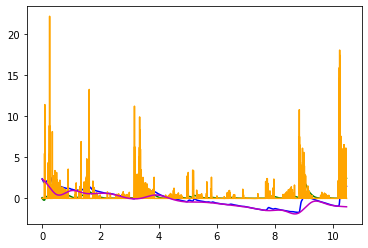

In [17]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(n_zscore1, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
pl.plot(tm, n_zscore1, color= 'blue',  label=' raw zscore data')
pl.plot(tm, r, color= 'green',  label='phasic component')
pl.plot(tm, p, color= 'orange',  label='sparse SMNA driver of phasic component')
pl.plot(tm, t, color= 'm',  label=' tonic component')
pl.show()

In [18]:
print(len(tm))
print( )
#print(tm)

5357



In [19]:
len(n_zscore1) # len(t) = 5357

5357

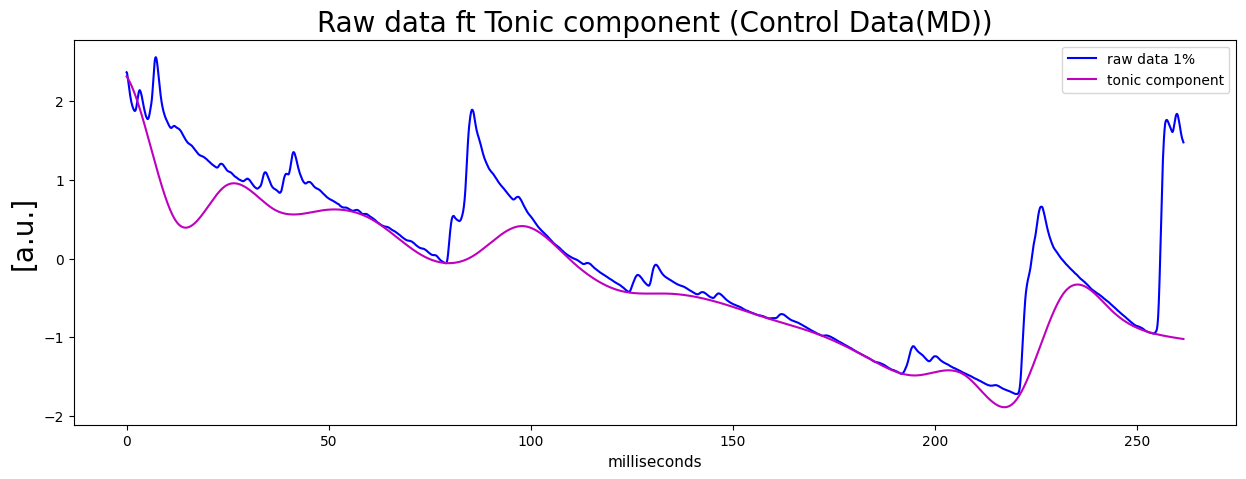

In [20]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime,n_zscore1,color = 'blue', label='raw data 1%')
plt.plot(n_vtime,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(MD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

## Emotional Index
1. To obtain the HR signal, employ the Pan-Tompkins algorithm.

2. Acquire the skin conductance using the constant voltage method (0.5 V).

3. Use LEDAlab software67 to obtain the tonic component of the skin conductance (i.e., skin conductance level (SCL)).

    a. Select "Continuous Decomposition Analysis" from the analysis menu.
    NOTE: It is recommended to optimize the analysis by clicking the "Optimize" button.
    
    b. Click on "Apply" to accept the analysis and have the decomposition plotted.
    
    
4. For the purpose of matching SCL and HR signals, refer to the circumplex model of affect plan [63,64], where the coordinates of a point in space are defined respectively by the HR (horizontal axis) to describe the valence and by the SCL (vertical axis) to describe the arousal phenomena.

5. To obtain a monodimensional variable, use the emotional state of a subject as described by the EI 10, defined by the formula:

$$ EI= 1 - β/π $$

NOTE: Here:

$\qquad \qquad  \qquad \qquad β = $

$$ \frac{3}{2} \pi + \pi - \theta \quad if \quad GSR_z \geqslant 0, \quad HR_z \leqslant 0, $$
$$ \frac{\pi}{2}  - \theta \quad otherwise $$ 

$HR$ and $GSR_z$ constitute the Ζ-score variables of HR and GSR, respectively, $ \theta $ is in radians, calculated as 

$$ arctang (HR_z,GSR_z)$$

Because the angle will vary between [−1, 1], the EI will vary between [−1, 1].

Bibliografía:

URL: https://www.jove.com/video/55872

DOI: doi:10.3791/55872


### Obtencíon de los datos HR_z

In [21]:
df_datos1['B: BVP'].min()

0.0

In [22]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b1 = []

for i in range (0,535679,100):
    x = df_datos1.iloc[i,1]
    b1.append(x)
#print(b1)

In [23]:
len(b1)

5357

In [24]:
# NORMALIZACION DEL VECTOR
import scipy 
from scipy import stats
b = stats.zscore(b1) # y ya está normalizado
Fs = 25;
print(b)

[-31.87297615 -12.63465157   3.25961051 ...  -0.88929991  -1.1216796
  -1.30826183]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


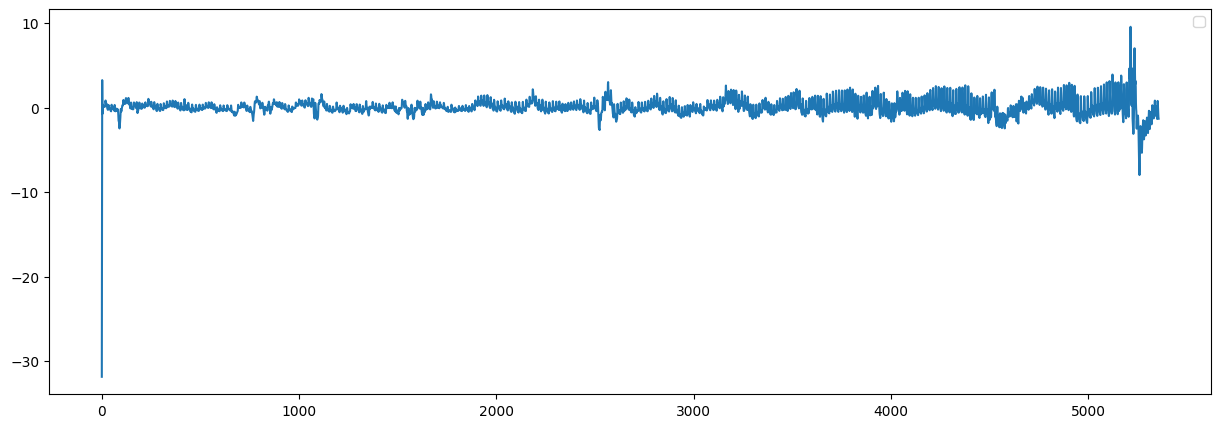

In [25]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b)

plt.legend()
plt.show()

https://www.hindawi.com/journals/cmmm/2014/912981/

### Research Article | Open Access
Volume 2014 | Article ID 912981 | https://doi.org/10.1155/2014/912981
#### "Neurophysiological Tools to Investigate Consumer’s Gender Differences during the Observation of TV Commercials"
Giovanni Vecchiato

Emotional Index
The Emotional Index is defined by taking into account the GSR and HR signals. As far as the construction of such variable is concerned, we refer to effects plane [39] where the coordinates of a point in this space are defined by the HR (horizontal axis) and the GSR (vertical axis). Several studies have highlighted that these two autonomic parameters correlate with valence and arousal, respectively (see [40] for a review).

In order to have a monodimensional variable, we describe the emotional state of a subject by defining the following Emotional Index (EI):

$GSR_z$, $HR_z$  represent the Z-score variables of GSR and HR respectively; $\theta$ , in radians, is measured as . Therefore, the angle $ \beta$ is defined in order to obtain the EI varying between . According to (2) and (3) and the effect plane [39], negative ($HR_z$) and positive ($GSR_z$) values of the EI are related to negative and positive emotions, respectively, spanning the whole effect plane. In the following, we will refer to the Emotional Index as Emotion.

Such cerebral indices take into account that the strong involvement of frontal and prefrontal areas has been already experienced in previous studies performed with high resolution EEG, functional connectivity, and graph theory tools [41–47] as well as in higher cognitive tasks [48–50].


### RESEARCH ARTICLE

#### "Analysis of physiological and non-contact signals to evaluate the emotional component in consumer preferences"

Rita LaureantiID*, Riccardo Barbieri, Luca Cerina, Luca Mainardi

Department of Electronics, Information and Bioengineering (DEIB), Politecnico di Milano, Milan, Italy


The index is based on the circumplex model of affect plan [21], where the coordinates of a point in space are defined respectively by the heart rate (horizontal axis) to describe the valence
and by the SCL (vertical axis) to describe the arousal level. The EI put together the information of both indexes to obtain a monodimenisional variable varying from [-1, 1], where a higher EI value indicates a more positive emotion experienced by the participant [20].

In [26]:
# ESTE VECTOR ES GSR_z
print(len(t))
print('GSR_z: ',t,)

5357
GSR_z:  [ 2.31642133  2.31259118  2.30867503 ... -1.02311192 -1.02347373
 -1.02383471]


In [27]:
# ESTE VECTOR ES HR_z
print(len(b))
print('HR_z: ',b,)

5357
HR_z:  [-31.87297615 -12.63465157   3.25961051 ...  -0.88929991  -1.1216796
  -1.30826183]


In [28]:
import math

# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,5357):
    r = t[i]/b[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5357)
EI = np.zeros (5357)
for i in range (0,5357):
    if t[i] >= 0 and b[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI[i] = 1- beta[i]/math.pi

print(EI)


[-0.68975976 -0.72429085  0.69615938 ...  0.77223599  0.73543783
  0.71136908]


In [29]:
print(EI)

[-0.68975976 -0.72429085  0.69615938 ...  0.77223599  0.73543783
  0.71136908]


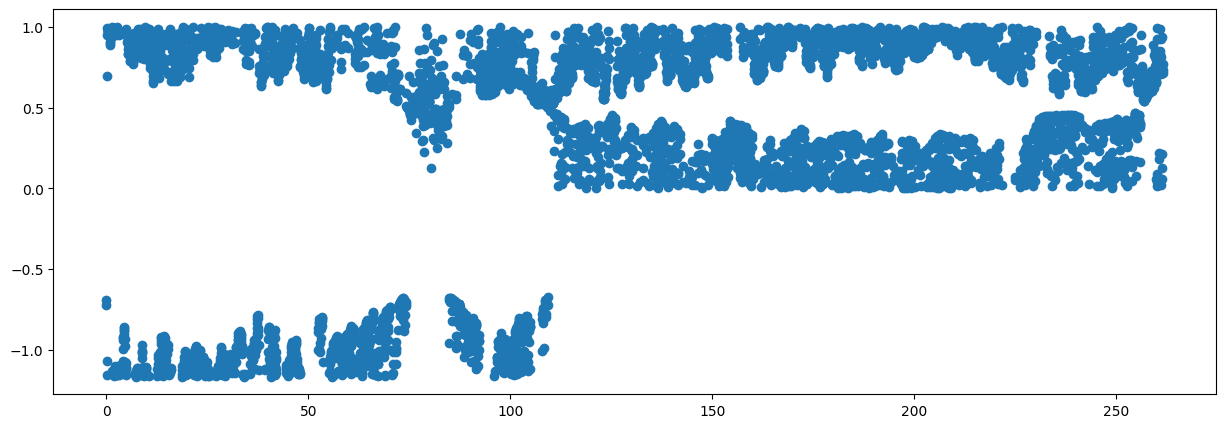

In [30]:
plt.figure(figsize=(15,5))
#plt.plot(n_vtime,EI,color = 'blue', label='Emotional index')
plt.scatter(n_vtime,EI) #,label='Emotional index')
#plt.ylabel('',fontsize=20) #unidad adimensional normalizada de los datos del programa
#plt.xlabel('',fontsize=11)
#plt.title('Emotional index over time in the control test (MD data)',fontsize=20)
#plt.legend()
plt.show()

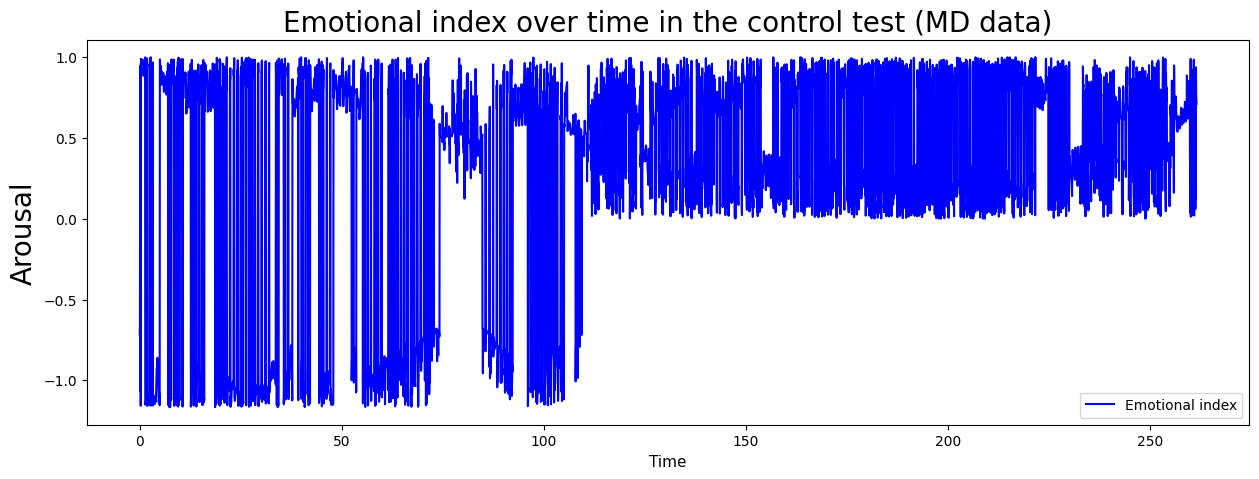

In [31]:
plt.figure(figsize=(15,5))
plt.plot(n_vtime,EI,color = 'blue', label='Emotional index')
plt.ylabel('Arousal',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('Time',fontsize=11)
plt.title('Emotional index over time in the control test (MD data)',fontsize=20)
plt.legend()
plt.show()

## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL EN EL CONTROL MD

In [32]:
len(EI)

5357

In [33]:
EI_average = np.average(EI) # = np.nanmean(EI)
print('El promedio es: ',EI_average,)

EI_sd = np.nanstd(EI)
print('La desviación estandar es: ',EI_sd,)

EI_var= np.var(EI)
print('La varianza es: ',EI_var,)

El promedio es:  0.29596126294795855
La desviación estandar es:  0.6856078517989876
La varianza es:  0.47005812644842265


# PROCESAMIENTO DE LOS DATOS DE  AMBIGÜEDAD (MD)

In [34]:
# read csv
df_datos2 = pd.read_csv('MD_ambiguedad.csv')
df_datos2

Hora  B: BVP  E: Skin Cond  G: Abd Resp
0         0.000488   0.000         9.271       35.689
1         0.000977   0.000         9.271       35.689
2         0.001465   0.000         9.271       35.689
3         0.001953   0.000         9.271       35.689
4         0.002441   0.001         9.271       35.689
...            ...     ...           ...          ...
655739  320.185547  38.032        12.397       36.508
655740  320.186035  38.040        12.397       36.508
655741  320.186523  38.048        12.397       36.508
655742  320.187012  38.056        12.397       36.508
655743  320.187500  38.064        12.397       36.508

[655744 rows x 4 columns]

## tomando el 1% de los datos

In [35]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector2 = []

for i in range (0,655744,100):
    x = df_datos2.iloc[i,2]
    n_vector2.append(x)
#print(n_vector2)

In [36]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime2 = []

for i in range (0,655744,100):
    x = df_datos2.iloc[i,0]
    n_vtime2.append(x)
#print(n_vtime2)
print(len(n_vtime2))

6558


In [37]:
len(n_vector2)

6558

In [38]:
v2 = df_datos2["E: Skin Cond"].to_numpy()
len(v2)

655744

In [39]:
t2 = df_datos2["Hora"].to_numpy()
len(t2)

655744

/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


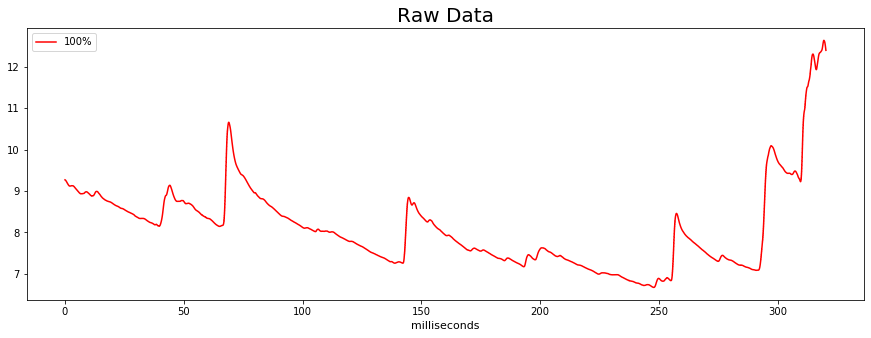

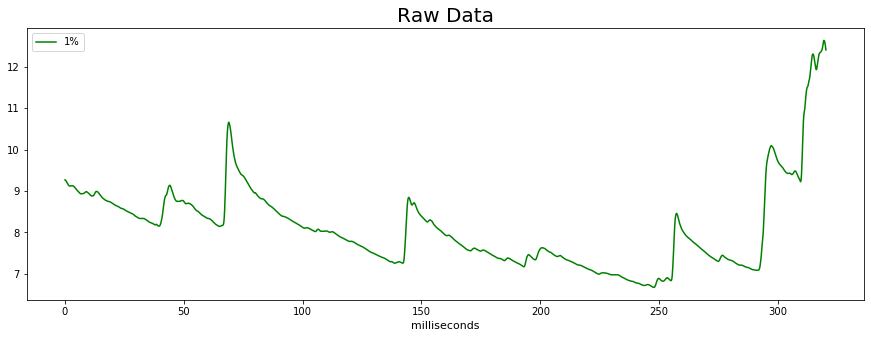

In [38]:
# COMPARACION DEL 100% VS EL 1%
# me falta t1 y v1
# n_vtime,n_vector1

fig,F = plt.subplots(1,1,figsize=(15,5))
F.plot(t2,v2,color = 'red', label='100%')
F.set_title('Raw Data',fontsize=20)
plt.xlabel('milliseconds',fontsize=11)
plt.legend()

fig,G = plt.subplots(1,1,figsize=(15,5))
G.plot(n_vtime2,n_vector2,color = 'green', label='1%')
G.set_title('Raw Data',fontsize=20)
plt.xlabel('milliseconds',fontsize=11)
plt.legend()

plt.show()


In [40]:
# NORMALIZACION DEL VECTOR del 100%
import scipy 
from scipy import stats
y2 = stats.zscore(v2) # y ya está normalizado
Fs = 25;
print(y2)

[1.08962421 1.08962421 1.08962421 ... 4.05980351 4.05980351 4.05980351]


In [41]:
# NORMALIZACION DEL VECTOR del 100%
tm2_100 =[]
for i in range(len(t2)):
    tm2_100.append(t2[i]/Fs)
        
print(tm2_100)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Como no corre con el100% delos datos provemos con el 1% (al igual que el caso anterior)

In [42]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y2 = stats.zscore(n_vector2) # y ya está normalizado
Fs = 25;
print(y2)

[1.08937851 1.08842845 1.08652835 ... 4.11529663 4.09154531 4.06874405]


In [43]:
n_zscore2 = stats.zscore(n_vector2)
print(n_zscore2)

[1.08937851 1.08842845 1.08652835 ... 4.11529663 4.09154531 4.06874405]


In [76]:
# NORMALIZACION DEL VECTOR del 100%
tm2 =[]
for i in range(len(n_vtime2)):
    tm2.append(n_vtime2[i]/Fs)
        
#print(tm2)

     pcost       dcost       gap    pres   dres
 0: -3.1683e+03 -3.0456e+03  2e+04  1e+02  6e+00
 1: -3.2332e+03 -5.5974e+03  3e+03  2e+01  1e+00
 2: -3.2634e+03 -3.6982e+03  4e+02  2e+00  1e-01
 3: -3.2678e+03 -3.3611e+03  9e+01  4e-01  2e-02
 4: -3.2695e+03 -3.2859e+03  2e+01  5e-02  2e-03
 5: -3.2750e+03 -3.2780e+03  3e+00  5e-04  2e-05
 6: -3.2768e+03 -3.2777e+03  9e-01  1e-04  5e-06
 7: -3.2772e+03 -3.2775e+03  3e-01  1e-05  7e-07
 8: -3.2773e+03 -3.2774e+03  9e-02  3e-06  2e-07
 9: -3.2773e+03 -3.2773e+03  3e-02  4e-07  2e-08
10: -3.2773e+03 -3.2773e+03  2e-02  3e-07  1e-08
11: -3.2773e+03 -3.2773e+03  7e-03  6e-08  3e-09
12: -3.2773e+03 -3.2773e+03  2e-03  1e-08  5e-10
13: -3.2773e+03 -3.2773e+03  5e-04  7e-10  3e-11
14: -3.2773e+03 -3.2773e+03  4e-04  4e-10  2e-11
15: -3.2773e+03 -3.2773e+03  1e-04  9e-11  5e-12
16: -3.2773e+03 -3.2773e+03  7e-05  4e-11  2e-12
17: -3.2773e+03 -3.2773e+03  2e-05  1e-11  9e-13
18: -3.2773e+03 -3.2773e+03  1e-05  8e-12  7e-13
19: -3.2773e+03 -3.27

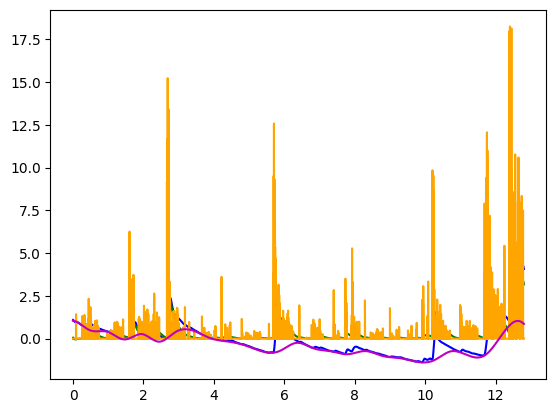

In [45]:
# falta general a tm

# con el 100% de los datos no funciona bien
#yn = (y - y.mean()) / y.std()
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y2, 1./Fs) # cvxEDA(yn, 1./Fs)

import pylab as pl
#pl.hold(True)
plt.plot(tm2, n_zscore2, color= 'blue')
plt.plot(tm2, r, color= 'green')
plt.plot(tm2, p, color= 'orange')
plt.plot(tm2, t, color= 'm')
plt.show()


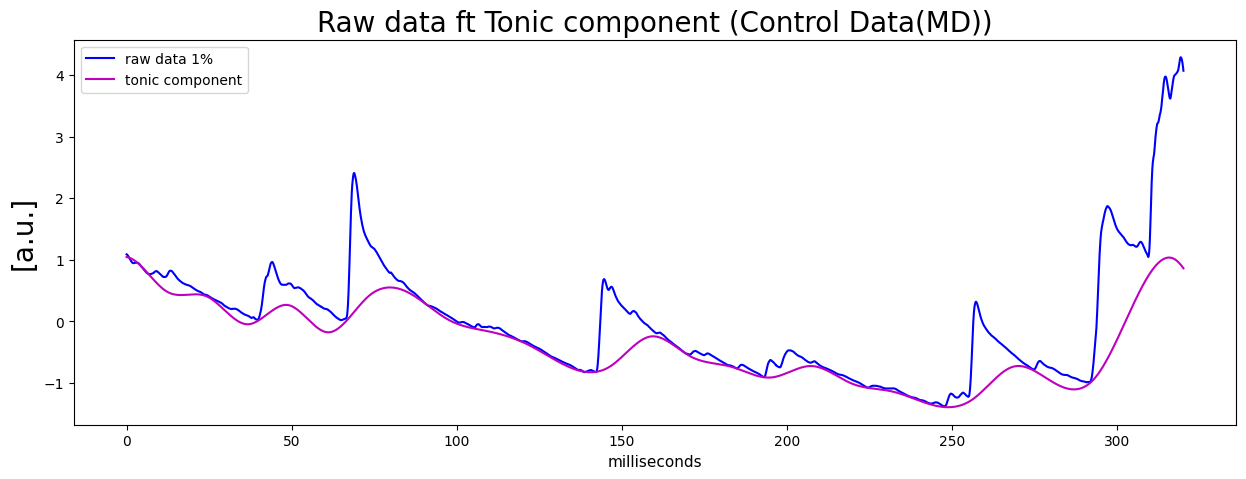

In [46]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime2,n_zscore2,color = 'blue', label='raw data 1%')
plt.plot(n_vtime2,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(MD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [44]:
df_datos2['B: BVP'].min()

0.0

In [47]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b2 = []

for i in range (0,655744,100):
    x = df_datos2.iloc[i,1]
    b2.append(x)
#print(b2)

In [48]:
len(b2)

6558

In [49]:
# NORMALIZACION DEL VECTOR
#import scipy 
#from scipy import stats
bzscore2 = stats.zscore(b2)
# y ya está normalizado
Fs = 25;
print(bzscore2)

[-19.70617447  -7.85873574   1.99120634 ...  -0.31549544  -0.13385711
   0.11760173]


In [50]:
# ESTE VECTOR ES GSR_z
print(len(t))
print('GSR_z: ',t,)

6558
GSR_z:  [1.04470993 1.04432494 1.04390448 ... 0.86963766 0.86599393 0.86231958]


In [51]:
# ESTE VECTOR ES HR_z
print(len(bzscore2))
print('HR_z: ',bzscore2,)

6558
HR_z:  [-19.70617447  -7.85873574   1.99120634 ...  -0.31549544  -0.13385711
   0.11760173]


In [52]:
# GENERACION DE UN VECTOR theta
theta2 = []
for i in range (0,6558):
    r = t[i]/bzscore2[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta2.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta2 = np.zeros (6558)
EI2 = np.zeros (6558)
for i in range (0,6558):
    if t[i] >= 0 and bzscore2[i] <= 0:
        beta2[i] = (2/3)*math.pi + math.pi - theta2[i]
    else:
        beta2[i] = math.pi/2 - theta2[i]

    EI2[i] = 1- beta2[i]/math.pi

print(EI2)


[-0.68352587 -0.70871958  0.65370058 ... -1.05588755 -1.11785167
  0.95685559]


In [53]:
len(EI2)

6558

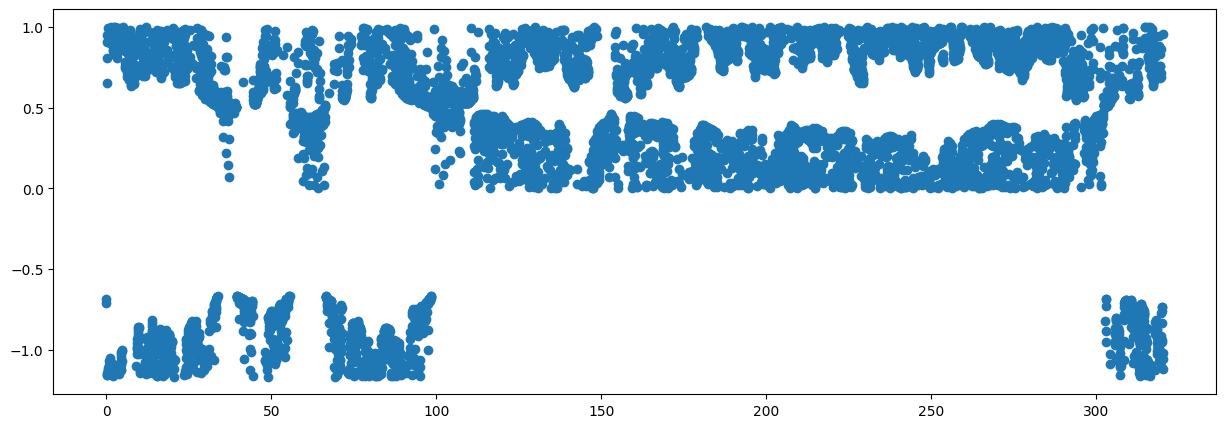

In [54]:
plt.figure(figsize=(15,5))
#plt.plot(n_vtime,EI,color = 'blue', label='Emotional index')
plt.scatter(n_vtime2,EI2) #,label='Emotional index')
#plt.ylabel('',fontsize=20) #unidad adimensional normalizada de los datos del programa
#plt.xlabel('',fontsize=11)
#plt.title('Emotional index over time in the control test (MD data)',fontsize=20)
#plt.legend()
plt.show()

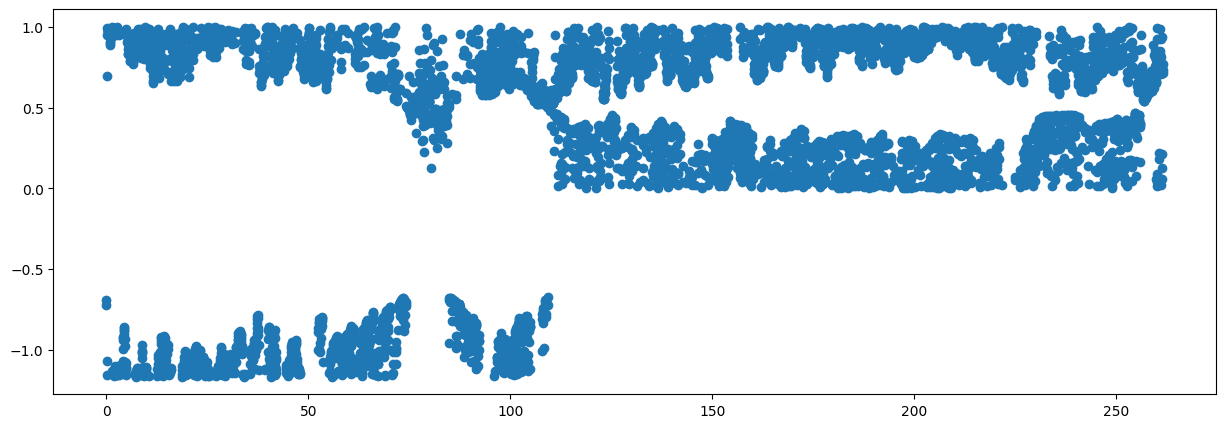

In [55]:
# PARA LA COMPARACION DEL CONTROL FT AMBIGUEDDA
plt.figure(figsize=(15,5))
plt.scatter(n_vtime,EI) #,label='Emotional index')

plt.show()

In [56]:
EI2_sample = []
n_vtime22  = []
for i in range (1800,2250,1):
    x = EI2[i]
    y = n_vtime2[i]
    EI2_sample.append(x)
    n_vtime22.append(y)

#print(EI2_sample)

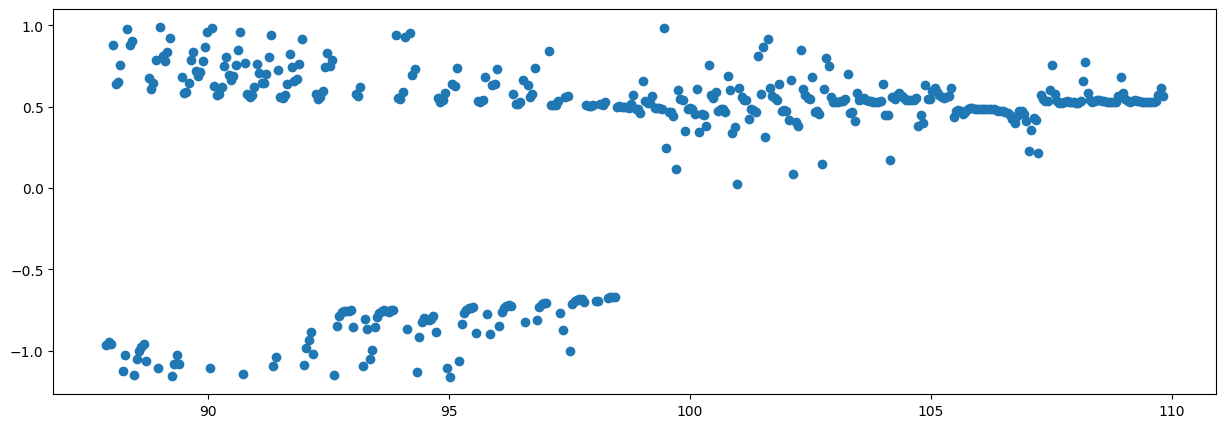

In [57]:
plt.figure(figsize=(15,5))
plt.scatter(n_vtime22,EI2_sample) #,label='Emotional index')
plt.show()

## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL EN LA AMBIGÜEDAD MD


In [64]:
len(EI2)


6558

In [59]:
EI2_average = np.average(EI2) # = np.nanmean(EI)
print('El promedio es: ',EI2_average,)

EI2_sd = np.nanstd(EI2)
print('La desviación estandar es: ',EI2_sd,)

EI2_var= np.var(EI2)
print('La varianza es: ',EI2_var,)

El promedio es:  0.3176296153032201
La desviación estandar es:  0.6192923725260413
La varianza es:  0.38352304266893306


In [60]:
# Define labels, positions, bar heights and error bar heights
labels = ['Control', 'Ambigüedad']
x_pos = np.arange(len(labels))
CTEs = [EI_average, EI2_average]
error = [EI_sd, EI2_sd]

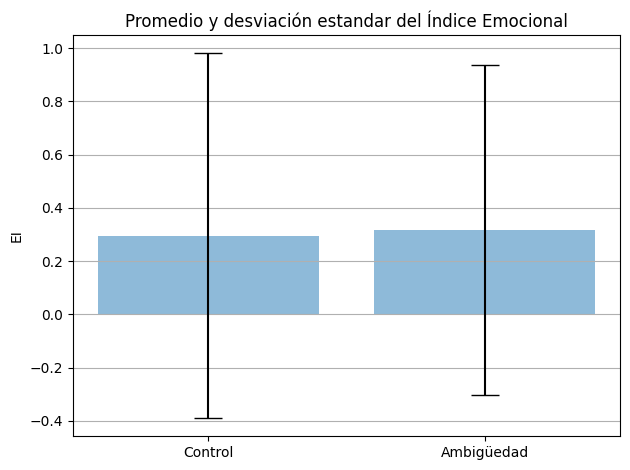

In [61]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_MD.png')
plt.show()

## DATOS DE CONTROL (GD)

In [63]:
# read csv
df_datos3 = pd.read_csv('GD_control.csv')
df_datos3

Hora  B: BVP  E: Skin Cond  G: Abd Resp
0         0.000488   0.000        12.804       41.067
1         0.000977   0.000        12.804       41.067
2         0.001465   0.000        12.804       41.067
3         0.001953   0.000        12.804       41.067
4         0.002441   0.001        12.804       41.067
...            ...     ...           ...          ...
817659  399.248047  39.449        13.266       40.561
817660  399.248535  39.475        13.266       40.561
817661  399.249023  39.500        13.266       40.561
817662  399.249512  39.525        13.266       40.561
817663  399.250000  39.550        13.266       40.561

[817664 rows x 4 columns]

In [132]:
x = df_datos3.iloc[0,2]
x

12.804

### tomando el 1% de los datos


In [66]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector3 = []

for i in range (0,817663,100):
    x = df_datos3.iloc[i,2]
    n_vector3.append(x)
#print(n_vector3)

In [67]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime3 = []

for i in range (0,817663,100):  # el total de los datos menos 1
    x = df_datos3.iloc[i,0]
    n_vtime3.append(x)
#print(n_vtime3)

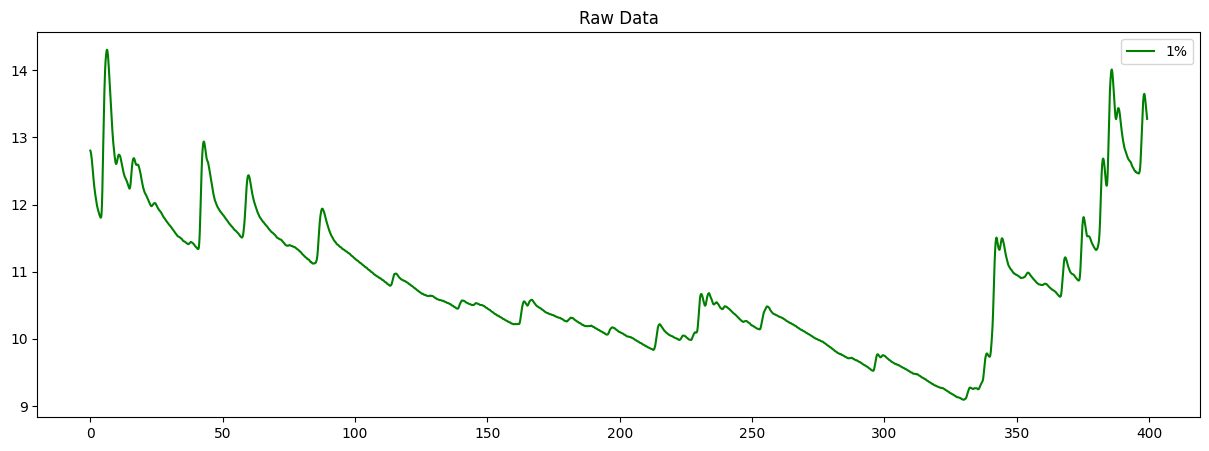

In [68]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime3,n_vector3,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [69]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y3 = stats.zscore(n_vector3) # y ya está normalizado
Fs = 25;
print(y3)

[2.00639339 2.00339137 1.99738733 ... 2.52173966 2.50172621 2.47971142]


In [70]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime3,y3,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [173]:
len(n_vtime3)

8177

In [174]:
tm3 =[]
for i in range(0,len(n_vtime3)):
    tm3.append(n_vtime3[i]/Fs)
        
#tm

# no sé que significa que tm salga así

In [175]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y3, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm3, y3, color= 'blue',  label=' raw zscore data')
plt.plot(tm3, r, color= 'green',  label='phasic component')
plt.plot(tm3, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm3, t, color= 'm',  label=' tonic component')
plt.show()


     pcost       dcost       gap    pres   dres
 0: -3.9720e+03 -3.8789e+03  2e+04  1e+02  4e+00
 1: -4.0250e+03 -6.6497e+03  3e+03  2e+01  8e-01
 2: -4.0652e+03 -5.1073e+03  1e+03  6e+00  2e-01
 3: -4.0727e+03 -4.2684e+03  2e+02  9e-01  3e-02
 4: -4.0746e+03 -4.1198e+03  5e+01  2e-01  5e-03
 5: -4.0788e+03 -4.0875e+03  9e+00  2e-03  7e-05
 6: -4.0852e+03 -4.0868e+03  2e+00  3e-04  1e-05
 7: -4.0860e+03 -4.0865e+03  5e-01  8e-05  2e-06
 8: -4.0862e+03 -4.0864e+03  1e-01  1e-05  3e-07
 9: -4.0863e+03 -4.0863e+03  4e-02  2e-06  6e-08
10: -4.0863e+03 -4.0863e+03  9e-03  2e-07  7e-09
11: -4.0863e+03 -4.0863e+03  6e-03  1e-07  3e-09
12: -4.0863e+03 -4.0863e+03  2e-03  2e-08  7e-10
13: -4.0863e+03 -4.0863e+03  1e-03  1e-08  4e-10
14: -4.0863e+03 -4.0863e+03  3e-04  3e-09  9e-11
15: -4.0863e+03 -4.0863e+03  2e-04  1e-09  4e-11
16: -4.0863e+03 -4.0863e+03  6e-05  3e-10  9e-12
17: -4.0863e+03 -4.0863e+03  2e-05  4e-11  2e-12
18: -4.0863e+03 -4.0863e+03  4e-06  1e-11  8e-13
19: -4.0863e+03 -4.08

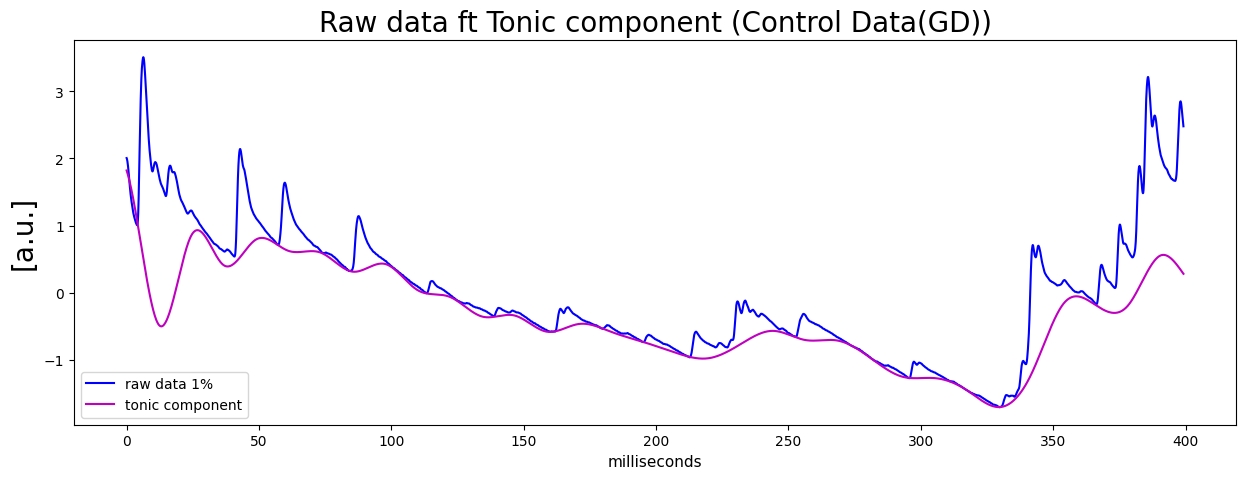

In [116]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime3,y3,color = 'blue', label='raw data 1%')
plt.plot(n_vtime3,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(GD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [170]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b3 = []

for i in range (0,817663,100):
    x = df_datos3.iloc[i,1]
    b3.append(x)
#print(b1)

In [171]:
len(b3)

8177

In [181]:
# NORMALIZACION DEL VECTOR AL 1%
import scipy 
from scipy import stats
b3_b = stats.zscore(b3) # y ya está normalizado
Fs = 25;
print(b3_b)

[-15.25682314  -6.02173545   1.4889768  ...  -0.81289599  -0.82385343
  -0.01746745]


In [182]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b3_b)

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [183]:
# ESTE VECTOR ES GSR_z
print(len(t))
print('GSR_z: ',t,)

# ESTE VECTOR ES HR_z
print(len(b))
print('HR_z: ',b3_b,)

8177
GSR_z:  [1.82156712 1.8155671  1.8094607  ... 0.28711497 0.28437295 0.28163034]
8177
HR_z:  [-15.25682314  -6.02173545   1.4889768  ...  -0.81289599  -0.82385343
  -0.01746745]


In [184]:
import math

# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,5357):
    r = t[i]/b3_b[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5357)
EI3 = np.zeros (5357)
for i in range (0,5357):
    if t[i] >= 0 and b3_b[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI3[i] = 1- beta[i]/math.pi

print(EI3)


[-0.70449178 -0.75987878  0.78083095 ...  0.66289839  0.76251921
  0.33639893]


In [185]:
EI3_average = np.average(EI3) # = np.nanmean(EI)
print('El promedio es: ',EI3_average,)

EI3_sd = np.nanstd(EI3)
print('La desviación estandar es: ',EI3_sd,)

EI3_var= np.var(EI3)
print('La varianza es: ',EI3_var,)


El promedio es:  0.25709183434348964
La desviación estandar es:  0.6367454350912022
La varianza es:  0.4054447491094843


## DATOS DE AMBIGÜEDAD (GD)

In [97]:
# read csv
df_datos4 = pd.read_csv('GD_ambiguedad.csv')
df_datos4

Hora  B: BVP  E: Skin Cond  G: Abd Resp
0         0.000488   0.000        15.730        40.20
1         0.000977   0.000        15.730        40.20
2         0.001465   0.000        15.730        40.20
3         0.001953   0.000        15.730        40.20
4         0.002441   0.001        15.730        40.20
...            ...     ...           ...          ...
550139  268.623047  35.776        20.503        42.07
550140  268.623535  35.775        20.503        42.07
550141  268.624023  35.774        20.503        42.07
550142  268.624512  35.773        20.503        42.07
550143  268.625000  35.772        20.503        42.07

[550144 rows x 4 columns]

### tomando el 1% de los datos

In [100]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector4 = []

for i in range (0,550144,100):
    x = df_datos4.iloc[i,2]
    n_vector4.append(x)
#print(n_vector4)

In [101]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime4 = []

for i in range (0,550144,100):  # el total de los datos menos 1
    x = df_datos4.iloc[i,0]
    n_vtime4.append(x)
#print(n_vtime4)


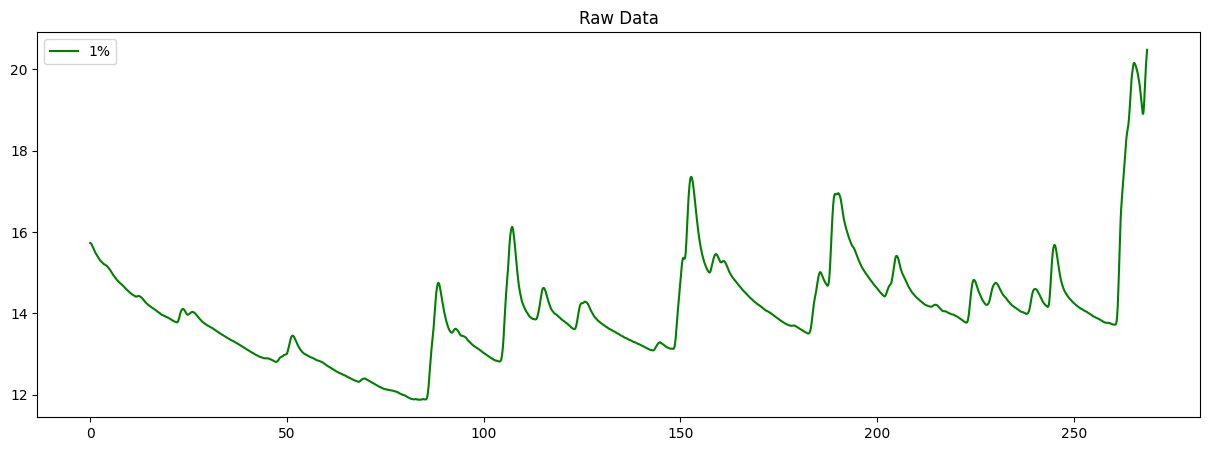

In [102]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime4,n_vector4,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [104]:
# NORMALIZACION DEL VECTOR del 1%
y4 = stats.zscore(n_vector4) # y ya está normalizado
Fs = 25;
print(y4)

[1.29332034 1.29332034 1.29096899 ... 4.92772702 4.97553785 5.0170784 ]


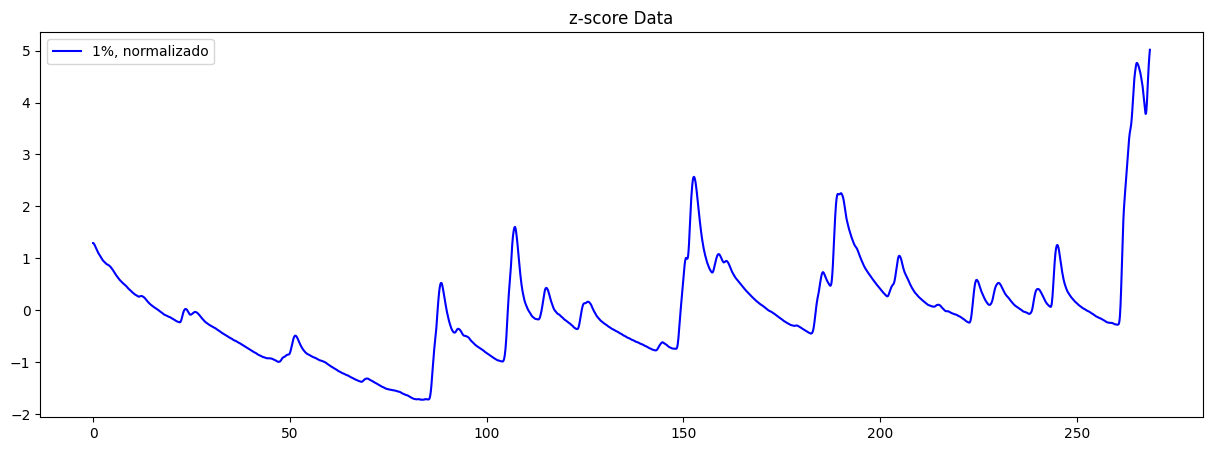

In [105]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime4,y4,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [134]:
tm4 =[]
for i in range(len(n_vtime4)):
    tm4.append(n_vtime4[i]/Fs)
        
#tm

# no sé que significa que tm salga así

     pcost       dcost       gap    pres   dres
 0: -2.5432e+03 -2.3477e+03  1e+04  1e+02  6e+00
 1: -2.6706e+03 -4.7011e+03  3e+03  2e+01  1e+00
 2: -2.7300e+03 -3.2598e+03  5e+02  4e+00  2e-01
 3: -2.7376e+03 -2.9496e+03  2e+02  1e+00  5e-02
 4: -2.7395e+03 -2.7651e+03  3e+01  8e-02  4e-03
 5: -2.7452e+03 -2.7502e+03  5e+00  6e-03  3e-04
 6: -2.7471e+03 -2.7492e+03  2e+00  2e-03  9e-05
 7: -2.7479e+03 -2.7489e+03  1e+00  3e-04  2e-05
 8: -2.7484e+03 -2.7487e+03  3e-01  9e-05  5e-06
 9: -2.7485e+03 -2.7486e+03  1e-01  2e-05  1e-06
10: -2.7485e+03 -2.7486e+03  5e-02  1e-05  6e-07
11: -2.7486e+03 -2.7486e+03  2e-02  3e-06  2e-07
12: -2.7486e+03 -2.7486e+03  6e-03  7e-07  4e-08
13: -2.7486e+03 -2.7486e+03  2e-03  2e-07  1e-08
14: -2.7486e+03 -2.7486e+03  4e-04  2e-09  1e-10
15: -2.7486e+03 -2.7486e+03  1e-04  1e-10  8e-12
16: -2.7486e+03 -2.7486e+03  3e-05  1e-11  2e-12
17: -2.7486e+03 -2.7486e+03  7e-06  1e-11  2e-12
18: -2.7486e+03 -2.7486e+03  2e-06  1e-11  3e-12
Optimal solution foun

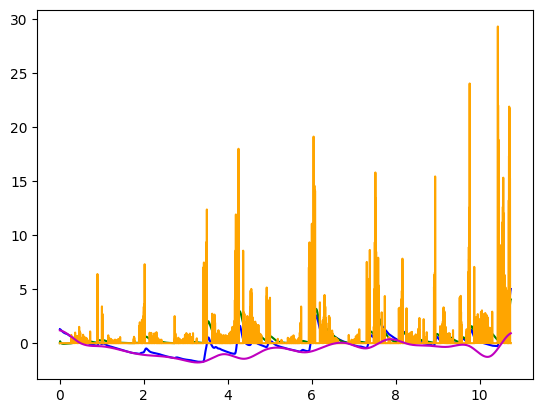

In [135]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y4, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm4, y4, color= 'blue',  label=' raw zscore data')
plt.plot(tm4, r, color= 'green',  label='phasic component')
plt.plot(tm4, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm4, t, color= 'm',  label=' tonic component')
plt.show()

In [136]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime4,y4,color = 'blue', label='raw data 1%')
plt.plot(n_vtime4,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Ambiguedad Data(GD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [163]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b4 = []

for i in range (100,550143,100): #este no arrancó desde cero porque en la entrada 1, vale cero y no se puede dividir entre cero
    x = df_datos4.iloc[i,1]
    b4.append(x)
#print(b3)

In [165]:
len(b4)

5501

In [177]:
# NORMALIZACION DEL VECTOR AL 1%
import scipy 
from scipy import stats
b4_b = stats.zscore(b4) # y ya está normalizado
Fs = 25;
print(b4_b)


[-6.79187865  1.88011315 -0.40756173 ... -0.66479166 -0.80222859
 -0.83890939]


In [157]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b)

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [159]:
t_b = np.delete(t,0)

In [178]:

# ESTE VECTOR ES GSR_z
print(len(t_b))
print('GSR_z: ',t_b,)

# ESTE VECTOR ES HR_z
print(len(b))
print('HR_z: ',b4_b,)


5501
GSR_z:  [1.18326087 1.181742   1.18016544 ... 0.90784165 0.91185064 0.91574743]
8177
HR_z:  [-6.79187865  1.88011315 -0.40756173 ... -0.66479166 -0.80222859
 -0.83890939]


In [179]:
# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,5501):
    r = t_b[i]/b4_b[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5501)
EI4 = np.zeros (5501)
for i in range (0,5501):
    if t_b[i] >= 0 and b4_b[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI4[i] = 1- beta[i]/math.pi

print(EI4)

[-0.72157062  0.67861859 -1.06082229 ... -0.9654752  -0.93699614
 -0.93059685]


In [180]:
EI4_average = np.average(EI4) # = np.nanmean(EI3)
print('El promedio es: ',EI4_average,)

EI4_sd = np.nanstd(EI4)
print('La desviación estandar es: ',EI4_sd,)

EI4_var= np.var(EI4)
print('La varianza es: ',EI4_var,)

El promedio es:  0.4184203497724155
La desviación estandar es:  0.45612634950398545
La varianza es:  0.2080512467118319


## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL 

In [186]:
# Define labels, positions, bar heights and error bar heights
labels = ['Control', 'Ambigüedad']
x_pos = np.arange(len(labels))
CTEs = [EI3_average, EI4_average]
error = [EI3_sd, EI4_sd]

In [199]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional (GD)')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_GD.png')
plt.show()

## DATOS DE CONTROL (PL)

In [4]:
# read csv
df_datos5 = pd.read_csv('PL_control.csv')
df_datos5

'Hora'  'B:BVP'  'E:Skin Cond'  'G:Abd Resp'
0          0.000488    0.000         11.467        34.556
1          0.000977    0.000         11.467        34.556
2          0.001465    0.000         11.467        34.556
3          0.001953    0.000         11.467        34.556
4          0.002441    0.001         11.467        34.556
...             ...      ...            ...           ...
1011707  493.998047   26.639          7.357        37.069
1011708  493.998535   26.645          7.357        37.069
1011709  493.999023   26.650          7.357        37.069
1011710  493.999512   26.656          7.357        37.069
1011711  494.000000   26.662          7.357        37.069

[1011712 rows x 4 columns]

## tomando el 1% de los datos

In [5]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector5 = []

for i in range (0,1011711,100):
    x = df_datos5.iloc[i,2]
    n_vector5.append(x)
#print(n_vector1)

In [6]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime5 = []

for i in range (0,1011711,100):  # el total de los datos menos 1
    x = df_datos5.iloc[i,0]
    n_vtime5.append(x)
#print(n_vtime)

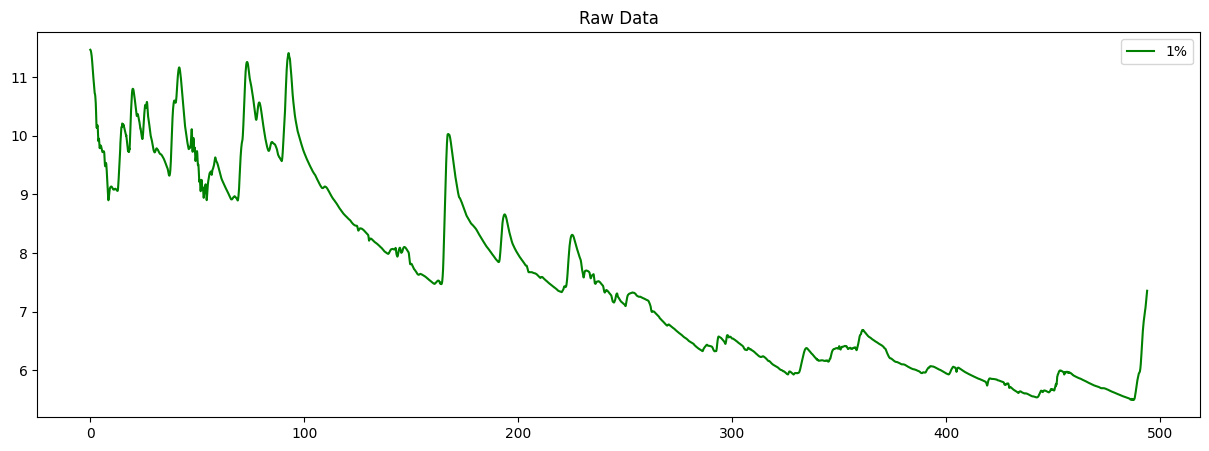

In [7]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime5,n_vector5,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [8]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y5 = stats.zscore(n_vector5) # y ya está normalizado
Fs = 25;
print(y5)

[ 2.5005695   2.49993508  2.49803184 ... -0.1303486  -0.11829472
 -0.10750967]


In [9]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime5,y5,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [10]:
tm5 =[]
for i in range(len(n_vtime5)):
    tm5.append(n_vtime5[i]/Fs)
        
#tm

# no sé que significa que tm salga así

     pcost       dcost       gap    pres   dres
 0: -5.0072e+03 -4.9455e+03  2e+04  1e+02  2e+00
 1: -5.0287e+03 -7.0221e+03  2e+03  2e+01  3e-01
 2: -5.0437e+03 -5.4368e+03  4e+02  3e+00  4e-02
 3: -5.0460e+03 -5.1215e+03  8e+01  4e-01  7e-03
 4: -5.0472e+03 -5.0634e+03  2e+01  4e-02  6e-04
 5: -5.0547e+03 -5.0579e+03  3e+00  2e-03  3e-05
 6: -5.0559e+03 -5.0575e+03  2e+00  8e-04  1e-05
 7: -5.0566e+03 -5.0573e+03  7e-01  3e-04  5e-06
 8: -5.0569e+03 -5.0572e+03  3e-01  5e-05  9e-07
 9: -5.0570e+03 -5.0571e+03  1e-01  1e-05  2e-07
10: -5.0570e+03 -5.0571e+03  7e-02  8e-06  1e-07
11: -5.0570e+03 -5.0571e+03  3e-02  2e-06  4e-08
12: -5.0571e+03 -5.0571e+03  1e-02  2e-08  4e-10
13: -5.0571e+03 -5.0571e+03  3e-03  4e-09  7e-11
14: -5.0571e+03 -5.0571e+03  2e-03  2e-09  3e-11
15: -5.0571e+03 -5.0571e+03  4e-04  4e-10  7e-12
16: -5.0571e+03 -5.0571e+03  2e-04  1e-10  2e-12
17: -5.0571e+03 -5.0571e+03  4e-05  2e-11  2e-12
18: -5.0571e+03 -5.0571e+03  2e-05  7e-12  1e-12
19: -5.0571e+03 -5.05

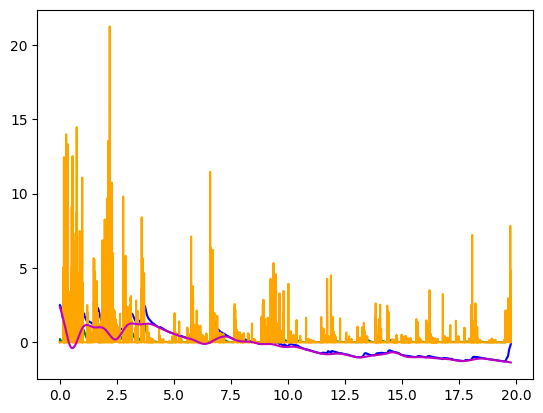

In [11]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y5, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm5, y5, color= 'blue',  label=' raw zscore data')
plt.plot(tm5, r, color= 'green',  label='phasic component')
plt.plot(tm5, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm5, t, color= 'm',  label=' tonic component')
plt.show()

In [12]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime5,y5,color = 'blue', label='raw data 1%')
plt.plot(n_vtime5,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(PL))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [13]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b5 = []

for i in range (0,1011711,100):
    x = df_datos5.iloc[i,1]
    b5.append(x)
#print(b1)

In [14]:
len(b5)

10118

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


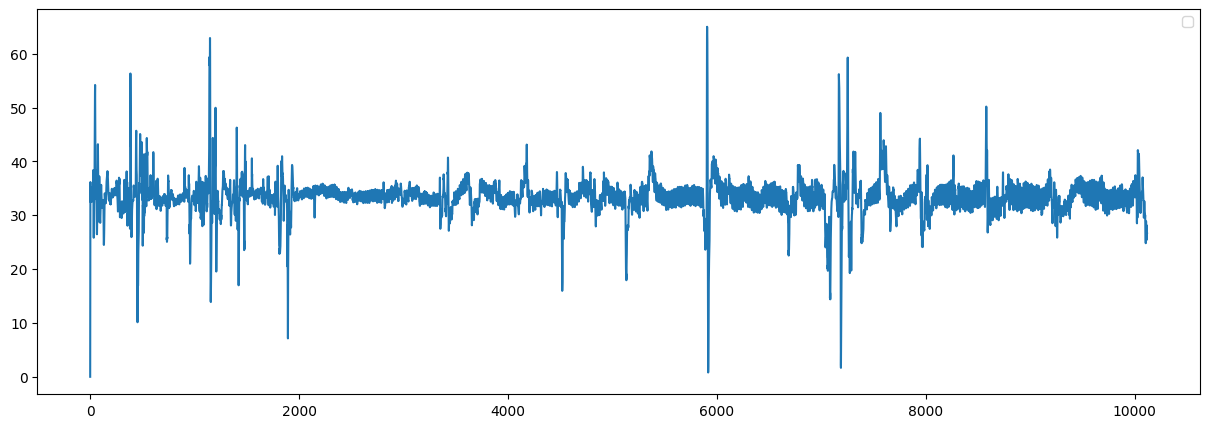

In [15]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b5)

plt.legend()
plt.show()

In [16]:
# ESTE VECTOR ES GSR_z
print(len(t))
print('GSR_z: ',t,)

# ESTE VECTOR ES HR_z
print(len(b5))
print('HR_z: ',b5,)

10118
GSR_z:  [ 2.35601921  2.34861587  2.34110189 ... -1.35600796 -1.35661527
 -1.35722306]
10118
HR_z:  [0.0, 19.683, 36.167, 32.478, 33.717, 33.623, 33.886, 33.9, 33.679, 33.174, 33.026, 32.802, 32.815, 32.635, 32.497, 33.169, 34.397, 34.625, 34.482, 35.055, 34.807, 34.347, 35.189, 34.449, 34.186, 33.356, 33.538, 34.08, 34.497, 34.75, 38.402, 38.05, 34.961, 29.997, 25.827, 31.576, 31.971, 32.738, 33.394, 33.888, 33.723, 33.018, 36.024, 42.156, 47.607, 51.172, 52.819, 54.202, 51.071, 45.311, 40.514, 37.909, 36.611, 36.962, 38.301, 37.149, 36.752, 36.457, 34.793, 33.589, 31.884, 30.126, 29.191, 28.129, 26.577, 26.472, 28.623, 28.846, 30.141, 31.384, 34.703, 38.3, 40.955, 42.95, 43.196, 41.294, 38.91, 36.262, 33.125, 30.368, 29.129, 28.838, 29.436, 30.657, 32.37, 33.921, 36.338, 37.235, 36.65, 35.359, 33.862, 32.363, 31.576, 30.318, 29.307, 29.05, 28.599, 29.162, 29.355, 29.829, 31.427, 32.772, 34.038, 34.482, 35.259, 35.645, 34.948, 33.636, 32.929, 32.172, 32.049, 31.985, 31.468, 31.3

In [17]:
for i in range (0,1,len(b5)):
    if b5[i] == 0:
        print(i)

0


In [18]:
t_b = np.delete(t,0)
b5_b = np.delete(b5,0)

In [19]:
import math

# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,5357):
    r = t_b[i]/b5_b[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5357)
EI5 = np.zeros (5357)
for i in range (0,5357):
    if t_b[i] >= 0 and b5_b[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI5[i] = 1- beta[i]/math.pi

print(EI5)

[0.53780266 0.5205756  0.52283069 ... 0.49719495 0.49730451 0.49727937]


In [20]:
EI5_average = np.average(EI5) # = np.nanmean(EI)
print('El promedio es: ',EI5_average,)

EI5_sd = np.nanstd(EI5)
print('La desviación estandar es: ',EI5_sd,)

EI5_var= np.var(EI5)
print('La varianza es: ',EI5_var,)

El promedio es:  0.504112577807388
La desviación estandar es:  0.0053767882884902495
La varianza es:  2.8909852299245906e-05


In [21]:
# Define labels, positions, bar heights and error bar heights
labels = ['Control']
x_pos = np.arange(len(labels))
CTEs = [EI5_average]
error = [EI5_sd]

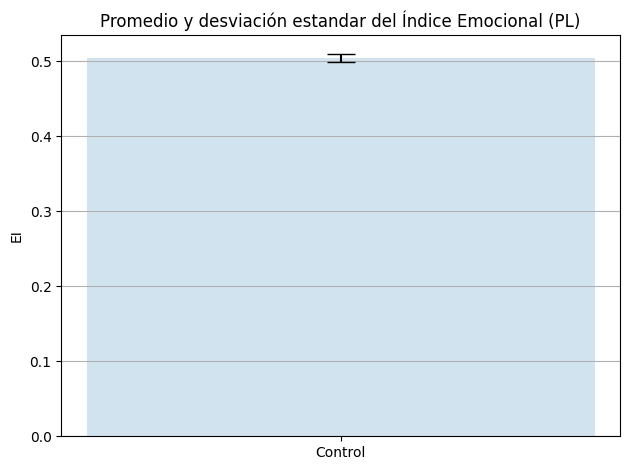

In [232]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional (PL)')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_PL.png')
plt.show()

 ## DATOS DE AMBIGÜEDAD (PL)

In [22]:
# read csv
df_datos6 = pd.read_csv('PL_ambiguedadR.csv')
df_datos6

Hora  B: BVP  E: Skin Cond  G: Abd Resp
0         0.000488   0.000         9.445       34.356
1         0.000977   0.000         9.445       34.356
2         0.001465   0.000         9.445       34.356
3         0.001953   0.000         9.445       34.356
4         0.002441   0.001         9.445       34.356
...            ...     ...           ...          ...
674171  329.185547  32.414         7.670       36.146
674172  329.186035  32.413         7.670       36.146
674173  329.186523  32.412         7.670       36.146
674174  329.187012  32.411         7.670       36.146
674175  329.187500  32.410         7.670       36.146

[674176 rows x 4 columns]

## tomando el 1% de los datos

In [24]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector6 = []

for i in range (0,674175,100):
    x = df_datos6.iloc[i,2]
    n_vector6.append(x)
#print(n_vector1)

In [25]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime6 = []

for i in range (0,674175,100):  # el total de los datos menos 1
    x = df_datos6.iloc[i,0]
    n_vtime6.append(x)
#print(n_vtime)

In [26]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime6,n_vector6,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()


In [27]:

# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y6 = stats.zscore(n_vector6) # y ya está normalizado
Fs = 25;
print(y6)

[2.04887138 2.04887138 2.04746477 ... 0.76393742 0.77870678 0.79136623]


In [28]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime6,y6,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [29]:
tm6 =[]
for i in range(len(n_vtime6)):
    tm6.append(n_vtime6[i]/Fs)
        
#tm

# no sé que significa que tm salga así

     pcost       dcost       gap    pres   dres
 0: -3.3439e+03 -3.3140e+03  1e+04  1e+02  3e+00
 1: -3.3542e+03 -4.5598e+03  1e+03  1e+01  4e-01
 2: -3.3621e+03 -3.5255e+03  2e+02  1e+00  3e-02
 3: -3.3635e+03 -3.3851e+03  2e+01  1e-01  3e-03
 4: -3.3670e+03 -3.3706e+03  4e+00  1e-03  3e-05
 5: -3.3693e+03 -3.3703e+03  1e+00  3e-04  9e-06
 6: -3.3697e+03 -3.3703e+03  5e-01  1e-04  4e-06
 7: -3.3700e+03 -3.3702e+03  2e-01  4e-05  1e-06
 8: -3.3701e+03 -3.3702e+03  7e-02  1e-05  3e-07
 9: -3.3701e+03 -3.3701e+03  2e-02  3e-06  8e-08
10: -3.3701e+03 -3.3701e+03  1e-02  1e-06  3e-08
11: -3.3701e+03 -3.3701e+03  4e-03  4e-07  1e-08
12: -3.3701e+03 -3.3701e+03  3e-03  2e-07  5e-09
13: -3.3701e+03 -3.3701e+03  7e-04  3e-08  9e-10
14: -3.3701e+03 -3.3701e+03  5e-04  1e-08  4e-10
15: -3.3701e+03 -3.3701e+03  1e-04  3e-09  9e-11
16: -3.3701e+03 -3.3701e+03  4e-05  2e-10  5e-12
17: -3.3701e+03 -3.3701e+03  3e-05  9e-11  3e-12
18: -3.3701e+03 -3.3701e+03  7e-06  2e-11  1e-12
19: -3.3701e+03 -3.37

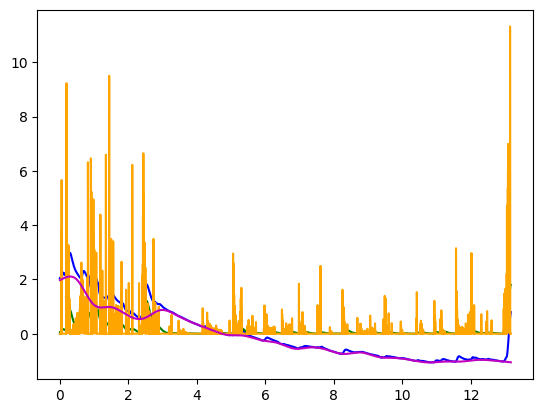

In [31]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y6, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm6, y6, color= 'blue',  label=' raw zscore data')
plt.plot(tm6, r, color= 'green',  label='phasic component')
plt.plot(tm6, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm6, t, color= 'm',  label=' tonic component')
plt.show()

In [33]:
print(len(tm6))
#print(tm)
len(y6)

6742


6742

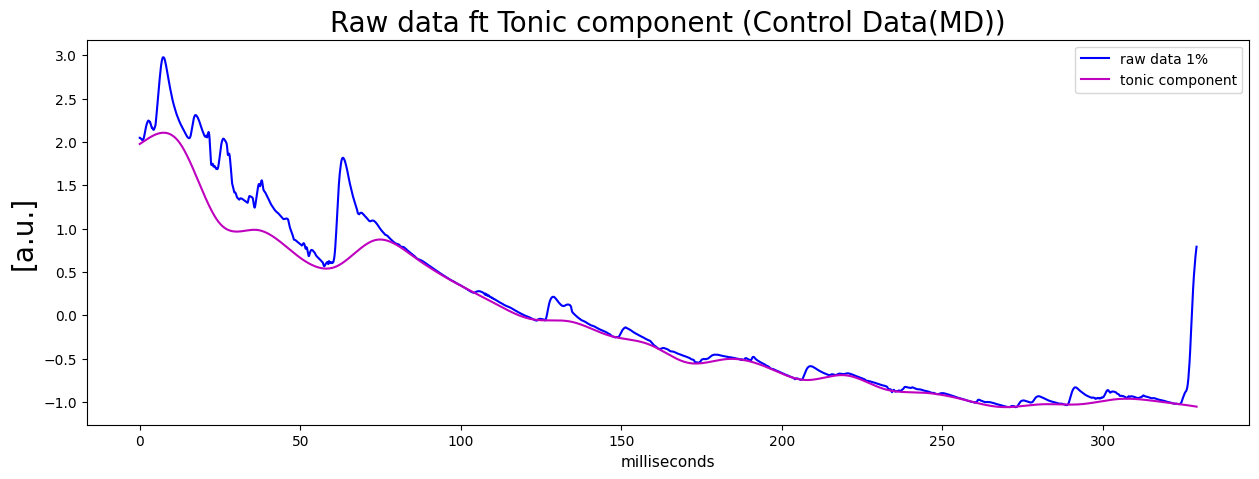

In [34]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime6,y6,color = 'blue', label='raw data 1%')
plt.plot(n_vtime6,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(MD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [35]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b6 = []

for i in range (0,674175,100):
    x = df_datos6.iloc[i,1]
    b6.append(x)
#print(b1)

In [36]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b6)

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [37]:
# ESTE VECTOR ES GSR_z
print(len(t))
print('GSR_z: ',t,)

# ESTE VECTOR ES HR_z
print(len(b6))
print('HR_z: ',b6,)

6742
GSR_z:  [ 1.97658466  1.97778552  1.9789884  ... -1.05383046 -1.0541267
 -1.05442363]
6742
HR_z:  [0.0, 20.224, 36.993, 33.002, 34.102, 33.384, 33.168, 32.877, 32.63, 32.431, 32.264, 32.146, 32.942, 33.966, 34.15, 34.015, 33.87, 33.609, 33.593, 33.68, 33.502, 33.309, 33.061, 32.878, 32.707, 32.592, 32.429, 32.328, 32.307, 33.219, 34.172, 34.268, 34.153, 34.052, 33.876, 33.907, 33.876, 33.641, 33.379, 33.152, 33.03, 32.917, 32.896, 32.81, 32.593, 32.411, 33.123, 33.591, 33.304, 32.891, 32.629, 32.178, 32.163, 32.604, 33.51, 34.91, 35.927, 35.509, 35.358, 35.09, 34.875, 34.739, 34.572, 34.669, 34.905, 35.266, 35.131, 35.223, 34.649, 34.578, 34.472, 33.32, 30.936, 29.069, 30.156, 31.007, 31.433, 32.185, 32.741, 33.701, 33.97, 34.245, 34.7, 34.106, 32.199, 30.393, 29.738, 29.999, 29.161, 26.833, 24.046, 23.415, 21.951, 25.491, 26.801, 31.77, 39.517, 50.46, 54.703, 54.228, 51.925, 58.966, 49.788, 29.202, 21.314, 16.793, 15.584, 15.246, 14.421, 16.861, 19.293, 17.967, 17.044, 17.602, 21

In [39]:
t_b = np.delete(t,0)
b6_b = np.delete(b6,0)

In [42]:
import math

# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,6741):
    r = t_b[i]/b6_b[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (6741)
EI6 = np.zeros (6741)
for i in range (0,6741):
    if t_b[i] >= 0 and b6_b[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI6[i] = 1- beta[i]/math.pi

print(EI6)

[0.53103012 0.51701218 0.51907643 ... 0.48965999 0.48961484 0.48963853]


In [43]:
EI6_average = np.average(EI6) # = np.nanmean(EI)
print('El promedio es: ',EI6_average,)

EI6_sd = np.nanstd(EI6)
print('La desviación estandar es: ',EI6_sd,)

EI6_var= np.var(EI6)
print('La varianza es: ',EI6_var,)

El promedio es:  0.4986988940964847
La desviación estandar es:  0.008481285271545267
La varianza es:  7.193219985733068e-05


## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL EN EL CONTROL MD

In [208]:
# Define labels, positions, bar heights and error bar heights
labels = ['Control', 'Ambigüedad']
x_pos = np.arange(len(labels))
CTEs = [EI5_average, EI6_average]
error = [EI5_sd, EI6_sd]

In [209]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_PL.png')
plt.show()

## DATOS DE CONTROL (BN)

In [80]:
# read csv
df_datos7 = pd.read_csv('BN_control.csv')
df_datos7

/tmp/ipykernel_128334/2667596379.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_datos7 = pd.read_csv('BN_control.csv')


Hora    B: BVP  E: Skin Cond  G: Abd Resp
0                    2048.000       256.000      256.000
1       0.000488281     0.000         6.335       43.822
2       0.000976563     0.000         6.335       43.822
3       0.001464844     0.000         6.335       43.822
4       0.001953125     0.000         6.335       43.822
...             ...       ...           ...          ...
652924   318.810547    37.441         6.820       44.096
652925   318.811035    37.441         6.820       44.096
652926   318.811523    37.441         6.820       44.096
652927   318.812012    37.441         6.820       44.096
652928     318.8125    37.441         6.820       44.096

[652929 rows x 4 columns]

## tomando el 1% de los datos

In [81]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector7 = []

for i in range (0,652928,100):
    x = df_datos7.iloc[i,2]
    n_vector7.append(x)
print(n_vector7)

[256.0, 6.334, 6.333, 6.332, 6.331, 6.33, 6.329, 6.328, 6.328, 6.327, 6.327, 6.327, 6.327, 6.327, 6.328, 6.328, 6.329, 6.329, 6.33, 6.331, 6.332, 6.332, 6.333, 6.334, 6.334, 6.335, 6.335, 6.336, 6.336, 6.336, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.337, 6.336, 6.337, 6.337, 6.336, 6.337, 6.337, 6.338, 6.339, 6.34, 6.342, 6.344, 6.346, 6.349, 6.352, 6.356, 6.359, 6.362, 6.365, 6.368, 6.371, 6.374, 6.377, 6.381, 6.383, 6.385, 6.387, 6.39, 6.391, 6.393, 6.394, 6.396, 6.397, 6.398, 6.399, 6.4, 6.401, 6.402, 6.402, 6.402, 6.402, 6.402, 6.402, 6.402, 6.402, 6.402, 6.401, 6.402, 6.402, 6.402, 6.401, 6.401, 6.401, 6.4, 6.4, 6.401, 6.402, 6.404, 6.407, 6.413, 6.421, 6.431, 6.443, 6.46, 6.479, 6.502, 6.526, 6.554, 6.582, 6.615, 6.645, 6.68, 6.712, 6.747, 6.779, 6.812, 6.842, 6.873, 6.9, 6.929, 6.953, 6.978, 6.998, 7.018, 7.035, 7.052, 7.065, 7.078, 7.089, 7.098, 7.105, 7.111, 7.116, 7.12, 7.122, 7.124, 7.123, 7.121, 7.121, 7.119, 7.115, 7.111, 7.106,

In [77]:
n_vector7_b = np.delete(n_vector7,0)
print(n_vector7_b)

[6.334 6.333 6.332 ... 6.833 6.827 6.822]


In [83]:
print(type(n_vector7_b ))

<class 'numpy.ndarray'>


In [64]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime7 = []

for i in range (0,652928,100):  # el total de los datos menos 1
    x = df_datos7.iloc[i,0]
    n_vtime7.append(x)
#print(n_vtime7)

[' ', '0.048828125', '0.09765625', '0.146484375', '0.1953125', '0.244140625', '0.29296875', '0.341796875', '0.390625', '0.439453125', '0.48828125', '0.537109375', '0.5859375', '0.634765625', '0.68359375', '0.732421875', '0.78125', '0.830078125', '0.87890625', '0.927734375', '0.9765625', '1.025390625', '1.07421875', '1.123046875', '1.171875', '1.220703125', '1.26953125', '1.318359375', '1.3671875', '1.416015625', '1.46484375', '1.513671875', '1.5625', '1.611328125', '1.66015625', '1.708984375', '1.7578125', '1.806640625', '1.85546875', '1.904296875', '1.953125', '2.001953125', '2.05078125', '2.099609375', '2.1484375', '2.197265625', '2.24609375', '2.294921875', '2.34375', '2.392578125', '2.44140625', '2.490234375', '2.5390625', '2.587890625', '2.63671875', '2.685546875', '2.734375', '2.783203125', '2.83203125', '2.880859375', '2.9296875', '2.978515625', '3.02734375', '3.076171875', '3.125', '3.173828125', '3.22265625', '3.271484375', '3.3203125', '3.369140625', '3.41796875', '3.46679687

In [86]:
n_vtime7b  = np.array(n_vtime7)

In [87]:
print(type(n_vtime7b))

<class 'numpy.ndarray'>


In [88]:
n_vtime7c = np.delete(n_vtime7b,0)
print(n_vtime7c)

['0.048828125' '0.09765625' '0.146484375' ... '318.7011719' '318.75'
 '318.7988281']


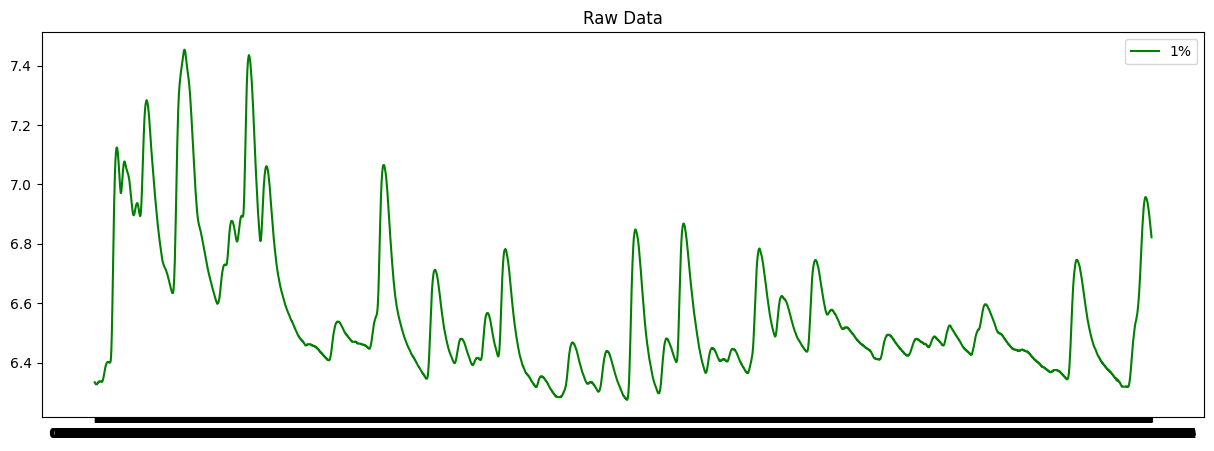

In [89]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime7c,n_vector7_b,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [70]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y7 = stats.zscore(n_vector7_b) # y ya está normalizado
Fs = 25;
print(y7)

[-0.98618292 -0.99059259 -0.99500225 ...  1.21423934  1.18778135
  1.16573303]


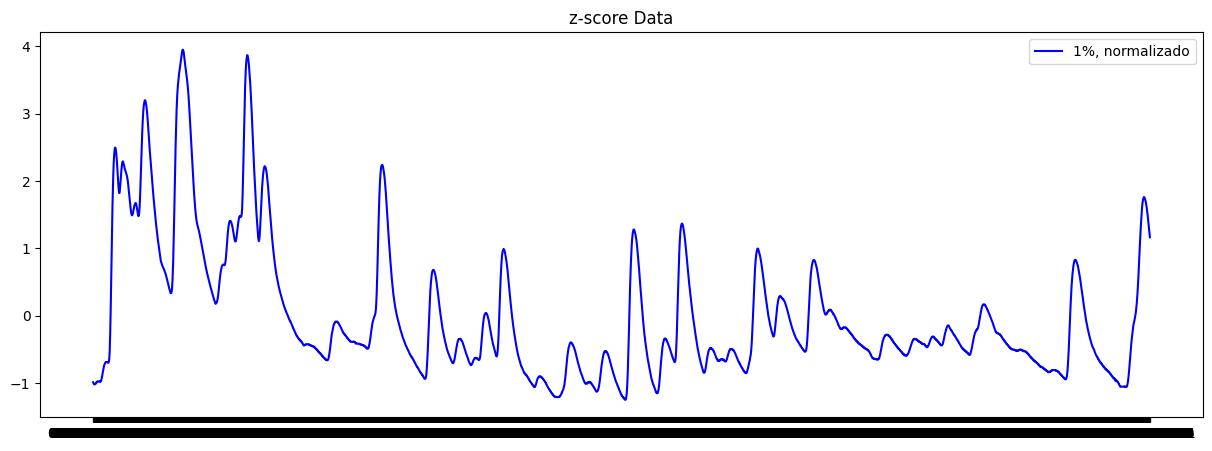

In [90]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime7c,y7,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [96]:
tm7 =[]
for i in range(len(n_vtime7c)):
    tm7.append(float(n_vtime7c[i])/Fs)

     pcost       dcost       gap    pres   dres
 0: -2.7813e+03 -2.3817e+03  2e+04  1e+02  7e+00
 1: -3.0784e+03 -6.9043e+03  5e+03  3e+01  1e+00
 2: -3.2339e+03 -4.3636e+03  1e+03  6e+00  3e-01
 3: -3.2484e+03 -3.5164e+03  3e+02  1e+00  5e-02
 4: -3.2504e+03 -3.2875e+03  4e+01  1e-01  5e-03
 5: -3.2561e+03 -3.2625e+03  6e+00  1e-03  5e-05
 6: -3.2600e+03 -3.2617e+03  2e+00  2e-04  1e-05
 7: -3.2605e+03 -3.2612e+03  6e-01  4e-05  2e-06
 8: -3.2608e+03 -3.2610e+03  2e-01  8e-06  4e-07
 9: -3.2609e+03 -3.2609e+03  5e-02  1e-06  6e-08
10: -3.2609e+03 -3.2609e+03  1e-02  2e-07  8e-09
11: -3.2609e+03 -3.2609e+03  9e-03  1e-07  5e-09
12: -3.2609e+03 -3.2609e+03  3e-03  2e-08  1e-09
13: -3.2609e+03 -3.2609e+03  2e-03  9e-09  4e-10
14: -3.2609e+03 -3.2609e+03  4e-04  2e-09  8e-11
15: -3.2609e+03 -3.2609e+03  2e-04  3e-10  1e-11
16: -3.2609e+03 -3.2609e+03  5e-05  6e-11  3e-12
17: -3.2609e+03 -3.2609e+03  9e-06  1e-11  2e-12
18: -3.2609e+03 -3.2609e+03  2e-06  1e-11  2e-12
Optimal solution foun

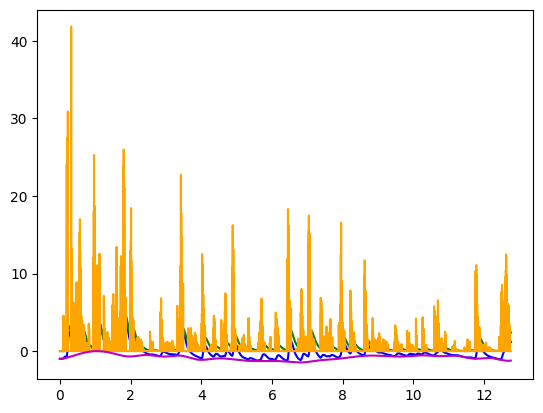

In [98]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y7, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm7, y7, color= 'blue',  label=' raw zscore data')
plt.plot(tm7, r, color= 'green',  label='phasic component')
plt.plot(tm7, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm7, t, color= 'm',  label=' tonic component')
plt.show()


In [100]:
print(len(tm7))
#print(tm)
len(y7)

6529


6529

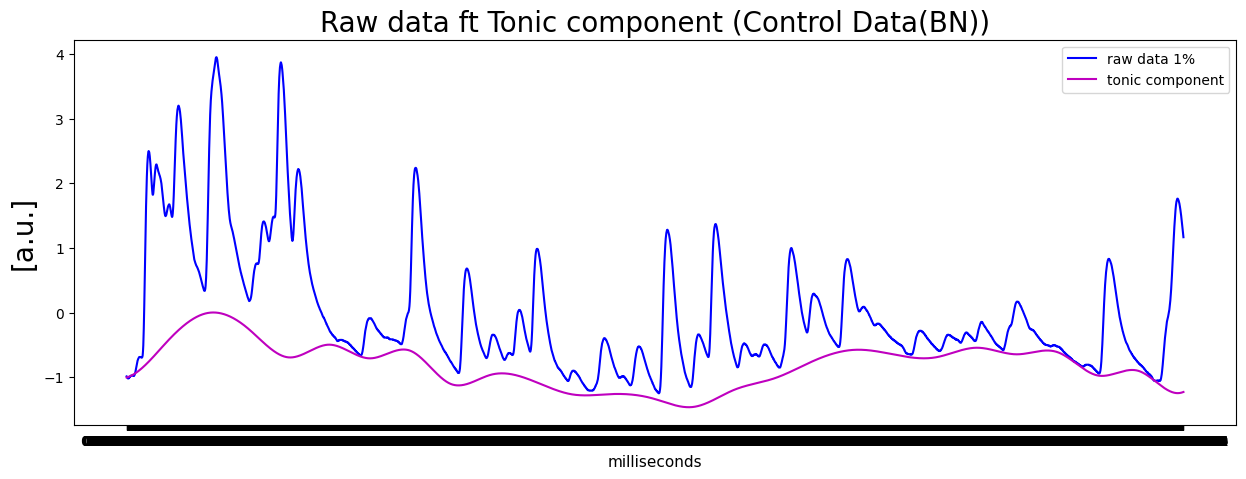

In [102]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime7c,y7,color = 'blue', label='raw data 1%')
plt.plot(n_vtime7c,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(BN))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [142]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b7 = []

for i in range (150,652928,100):
    x = df_datos7.iloc[i,1]
    b7.append(x)
print(len(b7))    
print(b7)

6528
[39.486, 38.199, 38.131, 38.348, 38.206, 38.308, 38.218, 38.107, 37.998, 37.913, 37.878, 37.852, 37.779, 37.699, 37.594, 37.478, 37.308, 37.185, 37.532, 38.267, 38.108, 37.776, 37.728, 37.711, 37.74, 37.8, 37.731, 37.586, 37.444, 37.339, 37.295, 37.25, 37.226, 37.176, 37.128, 37.048, 36.97, 37.149, 38.068, 38.252, 37.978, 38.023, 38.168, 38.075, 38.01, 38.099, 38.093, 37.923, 37.806, 37.772, 37.752, 37.714, 37.653, 37.55, 37.461, 37.393, 37.294, 37.378, 38.257, 38.589, 38.31, 38.331, 38.523, 38.447, 38.296, 38.324, 38.26, 38.073, 37.865, 37.777, 37.725, 37.649, 37.581, 37.428, 37.292, 37.233, 37.182, 37.099, 37.121, 37.713, 38.332, 38.078, 37.908, 38.038, 38.024, 37.883, 37.882, 37.844, 37.706, 37.574, 37.469, 37.436, 37.367, 37.363, 37.333, 37.278, 37.216, 37.192, 37.145, 37.062, 37.033, 37.657, 38.159, 37.835, 37.651, 37.744, 37.737, 37.685, 37.764, 37.79, 37.721, 37.65, 37.578, 37.528, 37.522, 37.526, 37.469, 37.38, 37.314, 37.234, 37.186, 37.099, 37.307, 38.038, 37.969, 37.617

In [143]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b7)

plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [146]:
t_b = np.delete(t,0)

In [147]:
# ESTE VECTOR ES GSR_z
print(len(t_b))
print('GSR_z: ',t_b,)

# ESTE VECTOR ES HR_z
print(len(b7))
print('HR_z: ',b7,)

6528
GSR_z:  [-1.00239072 -1.00164036 -1.00087002 ... -1.22899251 -1.22803294
 -1.22704792]
6528
HR_z:  [39.486, 38.199, 38.131, 38.348, 38.206, 38.308, 38.218, 38.107, 37.998, 37.913, 37.878, 37.852, 37.779, 37.699, 37.594, 37.478, 37.308, 37.185, 37.532, 38.267, 38.108, 37.776, 37.728, 37.711, 37.74, 37.8, 37.731, 37.586, 37.444, 37.339, 37.295, 37.25, 37.226, 37.176, 37.128, 37.048, 36.97, 37.149, 38.068, 38.252, 37.978, 38.023, 38.168, 38.075, 38.01, 38.099, 38.093, 37.923, 37.806, 37.772, 37.752, 37.714, 37.653, 37.55, 37.461, 37.393, 37.294, 37.378, 38.257, 38.589, 38.31, 38.331, 38.523, 38.447, 38.296, 38.324, 38.26, 38.073, 37.865, 37.777, 37.725, 37.649, 37.581, 37.428, 37.292, 37.233, 37.182, 37.099, 37.121, 37.713, 38.332, 38.078, 37.908, 38.038, 38.024, 37.883, 37.882, 37.844, 37.706, 37.574, 37.469, 37.436, 37.367, 37.363, 37.333, 37.278, 37.216, 37.192, 37.145, 37.062, 37.033, 37.657, 38.159, 37.835, 37.651, 37.744, 37.737, 37.685, 37.764, 37.79, 37.721, 37.65, 37.578, 37

In [148]:
import math

# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,6528):
    r = t_b[i]/b7[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5357)
EI7 = np.zeros (5357)
for i in range (0,5357):
    if t_b[i] >= 0 and b7[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI7[i] = 1- beta[i]/math.pi

print(EI7)


[0.49192113 0.49165531 0.49164686 ... 0.49510781 0.49509925 0.4950887 ]


In [149]:
EI7_average = np.average(EI7) # = np.nanmean(EI)
print('El promedio es: ',EI7_average,)

EI7_sd = np.nanstd(EI7)
print('La desviación estandar es: ',EI7_sd,)

EI7_var= np.var(EI7)
print('La varianza es: ',EI7_var,)

El promedio es:  0.4931041171348337
La desviación estandar es:  0.0030828644211426523
La varianza es:  9.50405303914722e-06


## PROCESAMIENTO DE LOS DATOS DE AMBIGÜEDAD (BN)

In [150]:
# read csv
df_datos8 = pd.read_csv('BN_ambiguedad.csv')
df_datos8

/tmp/ipykernel_128334/817817845.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_datos8 = pd.read_csv('BN_ambiguedad.csv')


Hora    B: BVP  E: Skin Cond  G: Abd Resp
0                    2048.000       256.000      256.000
1       0.000488281     0.000         7.274       47.400
2       0.000976563     0.000         7.274       47.400
3       0.001464844     0.000         7.274       47.400
4       0.001953125     0.000         7.274       47.400
...             ...       ...           ...          ...
677884   330.998047    38.380         7.274       44.575
677885   330.998535    38.378         7.274       44.575
677886   330.999023    38.377         7.274       44.575
677887   330.999512    38.375         7.274       44.575
677888        331.0    38.374         7.274       44.575

[677889 rows x 4 columns]

## tomando el 1% de los datos

In [152]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector8 = []

for i in range (1,677888,100):
    x = df_datos8.iloc[i,2]
    n_vector8.append(x)
#print(n_vector1)

In [153]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime8 = []

for i in range (1,677888,100):  # el total de los datos menos 1
    x = df_datos8.iloc[i,0]
    n_vtime8.append(x)
#print(n_vtime)

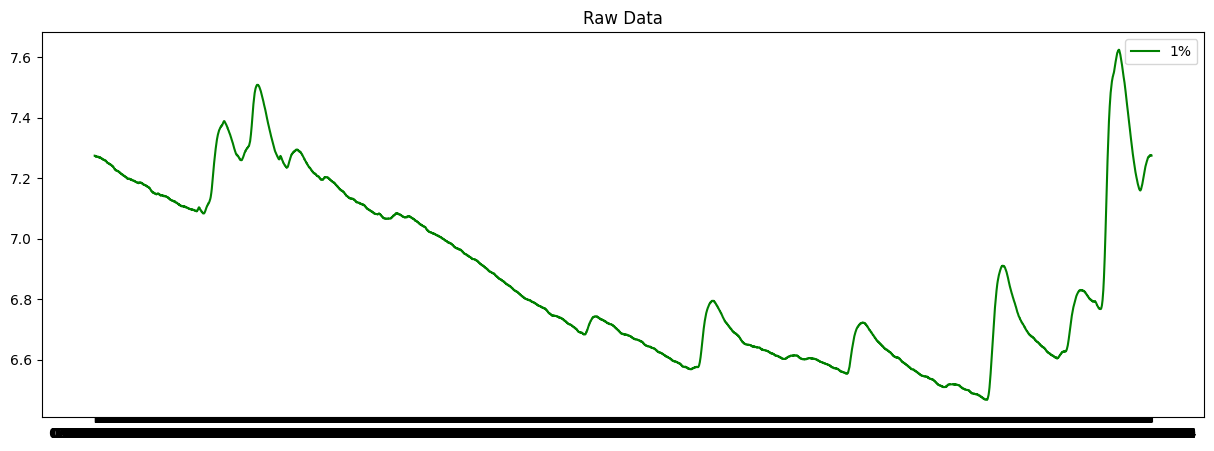

In [154]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime8,n_vector8,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()


In [155]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y8 = stats.zscore(n_vector8) # y ya está normalizado
Fs = 25;
print(y8)

[1.39821567 1.39821567 1.3946541  ... 1.40177723 1.39821567 1.39821567]


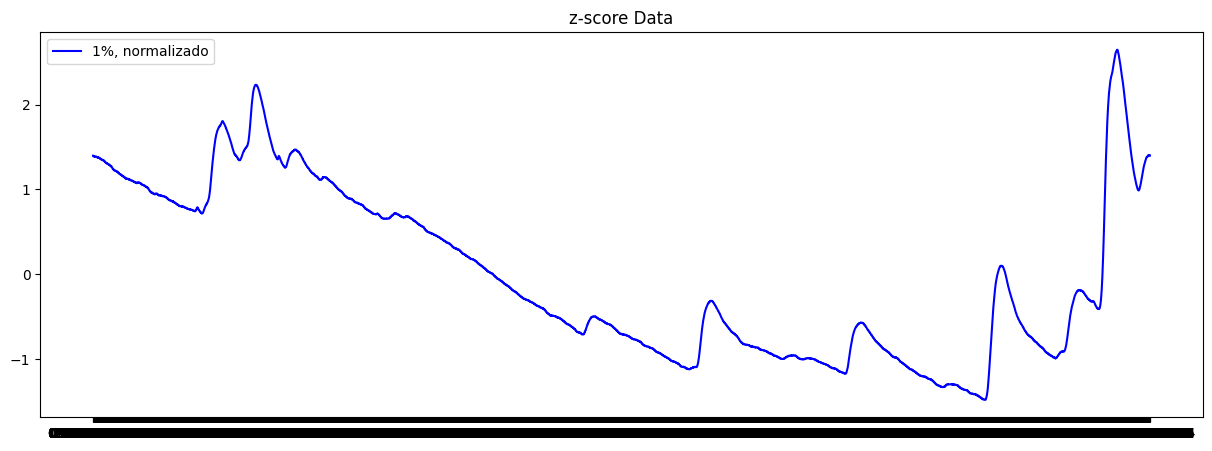

In [156]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime8,y8,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [158]:
tm8 =[]
for i in range(len(n_vtime8)):
    tm8.append(float(n_vtime8[i])/Fs)
        
#tm

In [160]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y8, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm8, y8, color= 'blue',  label=' raw zscore data')
plt.plot(tm8, r, color= 'green',  label='phasic component')
plt.plot(tm8, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm8, t, color= 'm',  label=' tonic component')
plt.show()

     pcost       dcost       gap    pres   dres
 0: -3.3237e+03 -3.2426e+03  2e+04  1e+02  4e+00
 1: -3.3650e+03 -5.4676e+03  3e+03  2e+01  6e-01
 2: -3.3792e+03 -3.6255e+03  2e+02  2e+00  5e-02
 3: -3.3808e+03 -3.4047e+03  2e+01  1e-01  4e-03
 4: -3.3853e+03 -3.3890e+03  4e+00  1e-03  4e-05
 5: -3.3879e+03 -3.3887e+03  9e-01  2e-04  8e-06
 6: -3.3883e+03 -3.3886e+03  3e-01  2e-05  6e-07
 7: -3.3884e+03 -3.3885e+03  8e-02  4e-06  1e-07
 8: -3.3884e+03 -3.3885e+03  2e-02  8e-07  3e-08
 9: -3.3885e+03 -3.3885e+03  9e-03  3e-07  9e-09
10: -3.3885e+03 -3.3885e+03  3e-03  8e-08  3e-09
11: -3.3885e+03 -3.3885e+03  9e-04  9e-09  3e-10
12: -3.3885e+03 -3.3885e+03  3e-04  1e-09  3e-11
13: -3.3885e+03 -3.3885e+03  2e-04  5e-10  2e-11
14: -3.3885e+03 -3.3885e+03  6e-05  1e-10  5e-12
15: -3.3885e+03 -3.3885e+03  2e-05  2e-11  8e-13
16: -3.3885e+03 -3.3885e+03  8e-06  6e-12  5e-13
17: -3.3885e+03 -3.3885e+03  1e-06  5e-12  8e-13
Optimal solution found.


In [161]:
print(len(tm8))
len(y8)

6779


6779

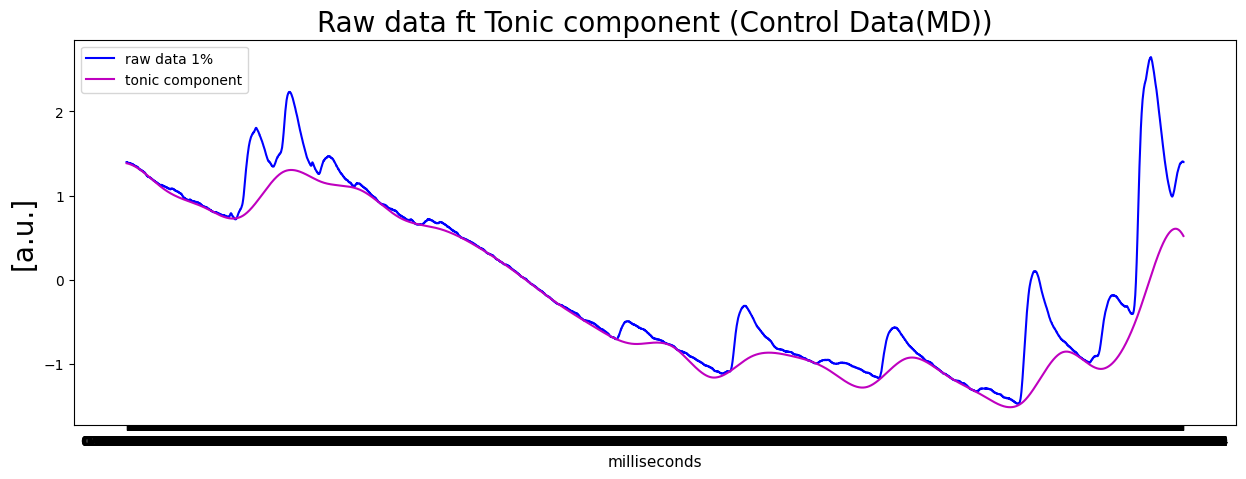

In [162]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime8,y8,color = 'blue', label='raw data 1%')
plt.plot(n_vtime8,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(BN))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [168]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b8 = []

for i in range (150,677888,100):
    x = df_datos8.iloc[i,1]
    b8.append(x)
print(b8)

[39.338, 38.123, 37.793, 38.054, 37.882, 37.869, 37.667, 37.539, 37.487, 37.436, 37.447, 37.438, 37.336, 37.27, 37.25, 37.175, 37.156, 37.532, 37.873, 37.679, 37.52, 37.465, 37.426, 37.378, 37.389, 37.389, 37.292, 37.222, 37.192, 37.246, 37.256, 37.123, 37.11, 37.082, 37.063, 36.994, 36.984, 37.013, 37.38, 37.78, 37.706, 37.637, 37.682, 37.778, 37.722, 37.741, 37.749, 37.673, 37.556, 37.413, 37.338, 37.332, 37.361, 37.381, 37.341, 37.323, 37.314, 37.272, 37.259, 37.229, 37.296, 37.799, 38.036, 37.866, 37.834, 37.943, 37.942, 37.894, 37.98, 38.041, 37.985, 37.906, 37.839, 37.813, 37.785, 37.711, 37.613, 37.548, 37.489, 37.427, 37.321, 37.253, 37.23, 37.532, 37.929, 37.768, 37.605, 37.555, 37.552, 37.519, 37.525, 37.503, 37.434, 37.347, 37.286, 37.23, 37.267, 37.28, 37.27, 37.227, 37.192, 37.163, 37.114, 37.103, 37.168, 37.648, 37.874, 37.694, 37.651, 37.737, 37.742, 37.701, 37.721, 37.705, 37.644, 37.586, 37.682, 37.771, 37.896, 37.944, 37.962, 37.981, 37.942, 37.887, 37.793, 37.656, 37

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


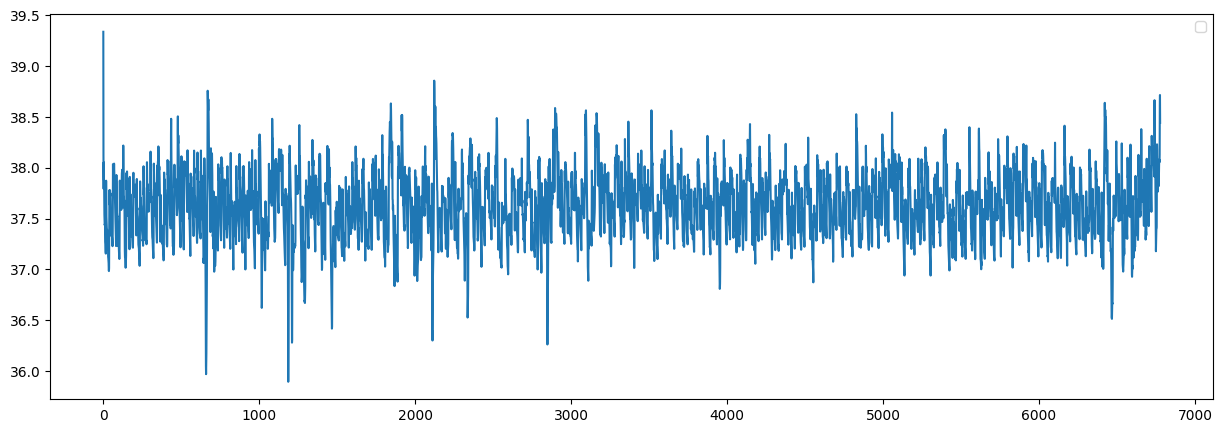

In [169]:
# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b8)

plt.legend()
plt.show()

In [171]:
t_b = np.delete(t,0)

In [173]:
# ESTE VECTOR ES GSR_z
print(len(t_b))
print('GSR_z: ',t_b,)

# ESTE VECTOR ES HR_z
print(len(b8))
print('HR_z: ',b8,)

6778
GSR_z:  [1.38378131 1.38340668 1.38301726 ... 0.52606385 0.52278937 0.51945533]
6778
HR_z:  [39.338, 38.123, 37.793, 38.054, 37.882, 37.869, 37.667, 37.539, 37.487, 37.436, 37.447, 37.438, 37.336, 37.27, 37.25, 37.175, 37.156, 37.532, 37.873, 37.679, 37.52, 37.465, 37.426, 37.378, 37.389, 37.389, 37.292, 37.222, 37.192, 37.246, 37.256, 37.123, 37.11, 37.082, 37.063, 36.994, 36.984, 37.013, 37.38, 37.78, 37.706, 37.637, 37.682, 37.778, 37.722, 37.741, 37.749, 37.673, 37.556, 37.413, 37.338, 37.332, 37.361, 37.381, 37.341, 37.323, 37.314, 37.272, 37.259, 37.229, 37.296, 37.799, 38.036, 37.866, 37.834, 37.943, 37.942, 37.894, 37.98, 38.041, 37.985, 37.906, 37.839, 37.813, 37.785, 37.711, 37.613, 37.548, 37.489, 37.427, 37.321, 37.253, 37.23, 37.532, 37.929, 37.768, 37.605, 37.555, 37.552, 37.519, 37.525, 37.503, 37.434, 37.347, 37.286, 37.23, 37.267, 37.28, 37.27, 37.227, 37.192, 37.163, 37.114, 37.103, 37.168, 37.648, 37.874, 37.694, 37.651, 37.737, 37.742, 37.701, 37.721, 37.705, 3

In [174]:
# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,6778):
    r = t_b[i]/b8[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (6778)
EI8 = np.zeros (6778)
for i in range (0,6778):
    if t_b[i] >= 0 and b8[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI8[i] = 1- beta[i]/math.pi

print(EI8)

[0.51119248 0.51154576 0.51164321 ... 0.50433628 0.50429794 0.50430097]


In [175]:
EI8_average = np.average(EI8) # = np.nanmean(EI)
print('El promedio es: ',EI8_average,)

EI8_sd = np.nanstd(EI8)
print('La desviación estandar es: ',EI8_sd,)

EI8_var= np.var(EI8)
print('La varianza es: ',EI8_var,)

El promedio es:  0.49819298996336275
La desviación estandar es:  0.007801637614269398
La varianza es:  6.08655494643831e-05


## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL EN EL CONTROL BN

In [203]:
# Define labels, positions, bar heights and error bar heights
labels = ['Control', 'Ambigüedad']
x_pos = np.arange(len(labels))
CTEs = [EI7_average, EI8_average]
error = [EI7_sd, EI8_sd]

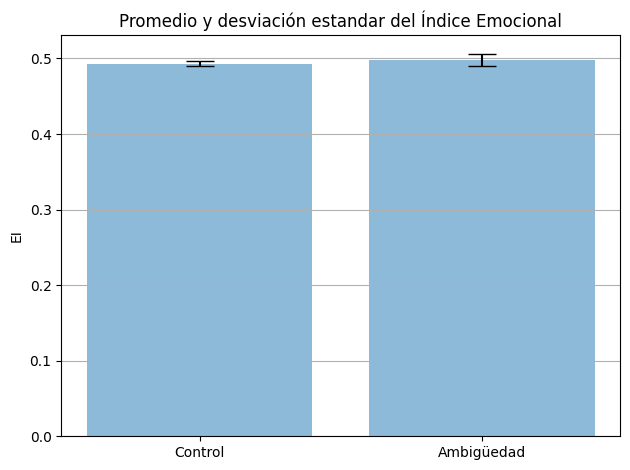

In [204]:

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_BN.png')
plt.show()

## DATOS DE HERRAMIENTA (BN)

In [179]:
# read csv
df_datos9 = pd.read_csv('BN_herramienta.csv')
df_datos9

/tmp/ipykernel_128334/22845062.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_datos9 = pd.read_csv('BN_herramienta.csv')


Hora    B: BVP  E: Skin Cond  G: Abd Resp
0                    2048.000       256.000      256.000
1       0.000488281     0.000         6.777       45.133
2       0.000976563     0.000         6.777       45.133
3       0.001464844     0.000         6.777       45.133
4       0.001953125     0.000         6.777       45.133
...             ...       ...           ...          ...
550012   268.560547    37.822         7.775       51.235
550013   268.561035    37.821         7.775       51.235
550014   268.561523    37.821         7.775       51.235
550015   268.562012    37.821         7.775       51.235
550016     268.5625    37.820         7.775       51.235

[550017 rows x 4 columns]

## tomando el 1% de los datos

In [180]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA LA CONDUCTANCIA DE LA PIEL

n_vector9 = []

for i in range (1,550016,100):
    x = df_datos9.iloc[i,2]
    n_vector9.append(x)
#print(n_vector1)

In [182]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL TIEMPO

n_vtime9 = []

for i in range (1,550016,100):  # el total de los datos menos 1
    x = df_datos9.iloc[i,0]
    n_vtime9.append(x)
#print(n_vtime)


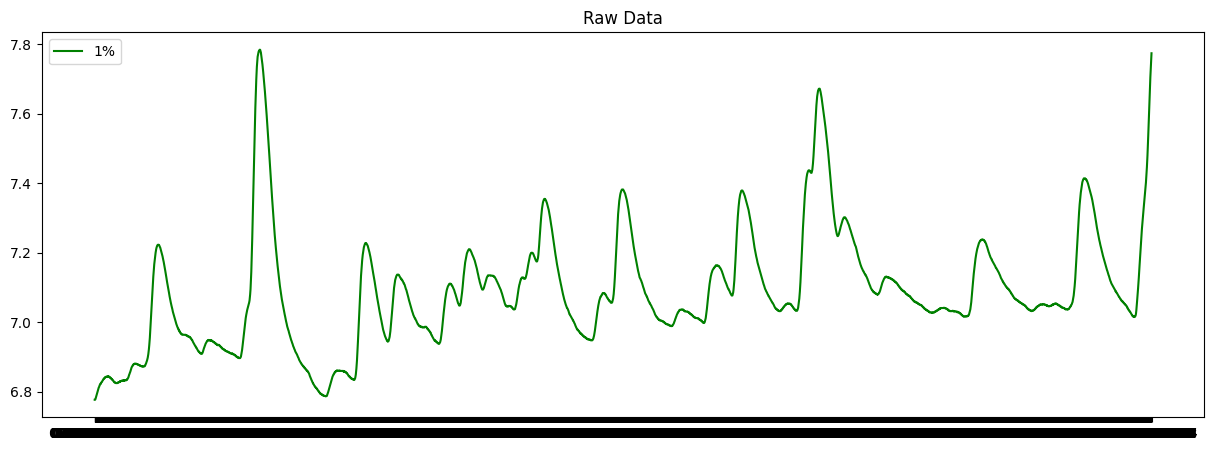

In [183]:
fig,V = plt.subplots(1,1,figsize=(15,5))
V.plot(n_vtime9,n_vector9,color = 'green', label='1%')
V.set_title('Raw Data')
plt.legend()
plt.show()

In [184]:
# NORMALIZACION DEL VECTOR del 1%
import scipy 
from scipy import stats
y9 = stats.zscore(n_vector9) # y ya está normalizado
Fs = 25;
print(y9)

[-1.84403546 -1.84403546 -1.84403546 ...  3.90594636  3.9647998
  4.02365325]


In [185]:
fig,W = plt.subplots(1,1,figsize=(15,5))
W.plot(n_vtime9,y9,color = 'blue', label='1%, normalizado')
W.set_title('z-score Data')
plt.legend()
plt.show()

In [187]:
tm9 =[]
for i in range(len(n_vtime9)):
    tm9.append(float(n_vtime9[i])/Fs)
        

     pcost       dcost       gap    pres   dres
 0: -2.2928e+03 -1.7695e+03  2e+04  1e+02  1e+01
 1: -2.6069e+03 -5.6621e+03  4e+03  2e+01  2e+00
 2: -2.7185e+03 -3.7055e+03  1e+03  5e+00  5e-01
 3: -2.7370e+03 -2.9679e+03  2e+02  7e-01  7e-02
 4: -2.7390e+03 -2.7875e+03  5e+01  1e-01  1e-02
 5: -2.7413e+03 -2.7515e+03  1e+01  9e-03  1e-03
 6: -2.7460e+03 -2.7488e+03  3e+00  2e-03  2e-04
 7: -2.7469e+03 -2.7480e+03  1e+00  4e-04  5e-05
 8: -2.7473e+03 -2.7476e+03  3e-01  8e-05  9e-06
 9: -2.7474e+03 -2.7475e+03  9e-02  1e-05  1e-06
10: -2.7475e+03 -2.7475e+03  2e-02  4e-07  5e-08
11: -2.7475e+03 -2.7475e+03  8e-03  9e-08  1e-08
12: -2.7475e+03 -2.7475e+03  2e-03  2e-08  2e-09
13: -2.7475e+03 -2.7475e+03  9e-04  3e-09  3e-10
14: -2.7475e+03 -2.7475e+03  2e-04  4e-10  5e-11
15: -2.7475e+03 -2.7475e+03  6e-05  7e-11  8e-12
16: -2.7475e+03 -2.7475e+03  2e-05  1e-11  1e-12
17: -2.7475e+03 -2.7475e+03  2e-06  1e-11  2e-12
Optimal solution found.


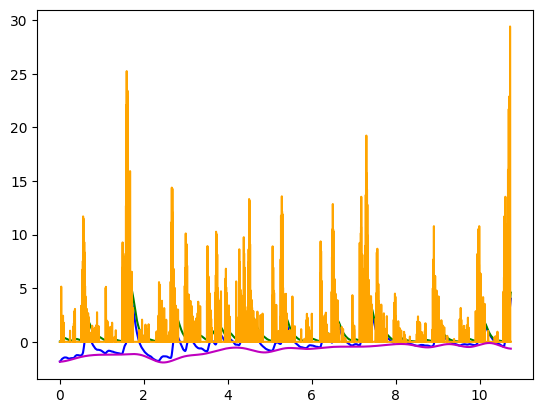

In [188]:
Fs = 25.
[r, p, t, l, d, e, obj] = cvxEDA(y9, 1./Fs)

import pylab as pl
#tm =  pl.arange(1., len(n_zscore1)+1.) / Fs
#pl.hold(True)
plt.plot(figsize=(15,5))
plt.plot(tm9, y9, color= 'blue',  label=' raw zscore data')
plt.plot(tm9, r, color= 'green',  label='phasic component')
plt.plot(tm9, p, color= 'orange',  label='sparse SMNA driver of phasic component')
plt.plot(tm9, t, color= 'm',  label=' tonic component')
plt.show()

In [189]:
print(len(tm9))
len(y9)

5501


5501

In [190]:
plt.figure(figsize=(15,5))
#plt.xlim(500,650000)
#plt.ylim(15,50)
plt.plot(n_vtime9,y9,color = 'blue', label='raw data 1%')
plt.plot(n_vtime9,t,color = 'm', label='tonic component')
plt.ylabel('[a.u.]',fontsize=20) #unidad adimensional normalizada de los datos del programa
plt.xlabel('milliseconds',fontsize=11)
plt.title('Raw data ft Tonic component (Control Data(MD))',fontsize=20)
plt.legend()
plt.show()

## Cálculo del index

In [197]:
# GENERACION DE UN VECTOR CON EL 1% DE LOS DATOS PARA EL RITMO  CARDIACO

b9 = []

for i in range (150,550017,100):
    x = df_datos9.iloc[i,1]
    b9.append(x)
print(b9)

[39.119, 37.916, 37.82, 38.077, 37.954, 38.064, 38.009, 37.906, 37.83, 37.78, 37.773, 37.747, 37.737, 37.657, 37.54, 37.473, 37.35, 37.239, 37.21, 37.552, 38.028, 37.931, 37.755, 37.72, 37.735, 37.661, 37.679, 37.63, 37.553, 37.423, 37.356, 37.258, 37.151, 37.059, 37.013, 36.962, 36.871, 36.803, 36.658, 36.642, 37.012, 37.571, 37.479, 37.322, 37.348, 37.418, 37.332, 37.341, 37.346, 37.322, 37.163, 37.095, 37.173, 37.236, 37.289, 37.339, 37.48, 37.785, 37.858, 37.721, 37.586, 37.543, 37.803, 38.372, 38.345, 38.043, 37.98, 38.012, 37.844, 37.785, 37.755, 37.564, 37.506, 37.37, 37.281, 37.175, 37.078, 37.052, 36.997, 36.892, 36.712, 36.586, 36.443, 36.774, 37.051, 37.008, 37.014, 37.159, 37.239, 37.171, 37.319, 37.417, 37.451, 37.489, 37.722, 37.791, 37.793, 37.704, 37.661, 37.628, 37.531, 37.454, 37.341, 37.352, 37.793, 38.094, 37.875, 37.821, 37.96, 37.965, 37.917, 38.083, 38.197, 38.229, 38.161, 38.165, 38.18, 38.144, 38.062, 37.994, 37.908, 37.863, 37.747, 37.631, 37.526, 37.653, 38.2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


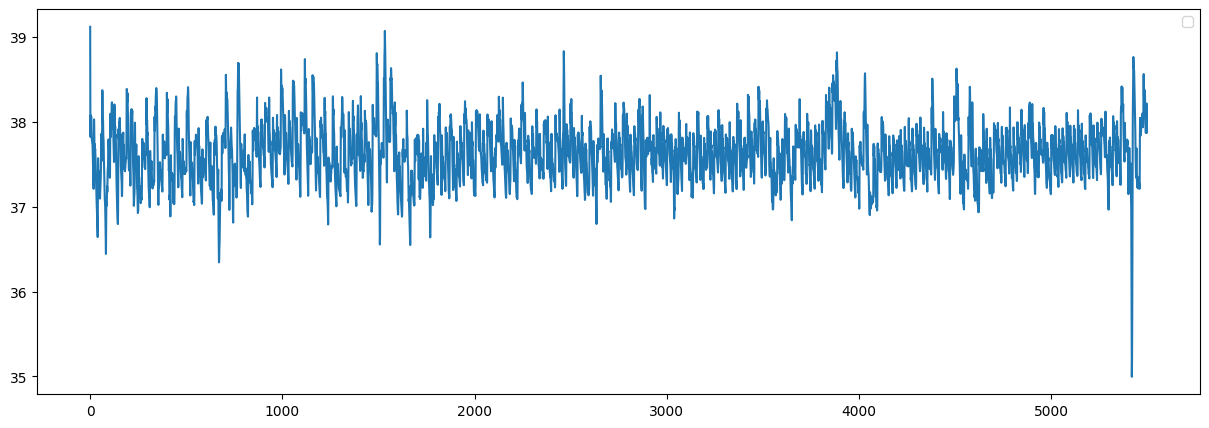

In [195]:

# el avance del tiempo no es lineal f(x)=x,  por lo que no puedo sustituirlo por un simple contador
fig,B = plt.subplots(1,1,figsize=(15,5))
B.plot(b9)

plt.legend()
plt.show()

In [199]:
tb = np.delete(t,0)
tc = np.delete(tb,0)

In [200]:
# ESTE VECTOR ES GSR_z
print(len(tc))
print('GSR_z: ',tc,)

# ESTE VECTOR ES HR_z
print(len(b9))
print('HR_z: ',b9,)

5499
GSR_z:  [-1.85713551 -1.85668234 -1.85620864 ... -0.63516447 -0.6356351
 -0.63606606]
5499
HR_z:  [39.119, 37.916, 37.82, 38.077, 37.954, 38.064, 38.009, 37.906, 37.83, 37.78, 37.773, 37.747, 37.737, 37.657, 37.54, 37.473, 37.35, 37.239, 37.21, 37.552, 38.028, 37.931, 37.755, 37.72, 37.735, 37.661, 37.679, 37.63, 37.553, 37.423, 37.356, 37.258, 37.151, 37.059, 37.013, 36.962, 36.871, 36.803, 36.658, 36.642, 37.012, 37.571, 37.479, 37.322, 37.348, 37.418, 37.332, 37.341, 37.346, 37.322, 37.163, 37.095, 37.173, 37.236, 37.289, 37.339, 37.48, 37.785, 37.858, 37.721, 37.586, 37.543, 37.803, 38.372, 38.345, 38.043, 37.98, 38.012, 37.844, 37.785, 37.755, 37.564, 37.506, 37.37, 37.281, 37.175, 37.078, 37.052, 36.997, 36.892, 36.712, 36.586, 36.443, 36.774, 37.051, 37.008, 37.014, 37.159, 37.239, 37.171, 37.319, 37.417, 37.451, 37.489, 37.722, 37.791, 37.793, 37.704, 37.661, 37.628, 37.531, 37.454, 37.341, 37.352, 37.793, 38.094, 37.875, 37.821, 37.96, 37.965, 37.917, 38.083, 38.197, 38.2

In [201]:
# GENERACION DE UN VECTOR theta
theta = []
for i in range (0,5499):
    r = tc[i]/b9[i]   # t = GSR_z   &  HR_z = b
    x = math.atan(r) #resultado en radianes
    theta.append(x)
#print(theta)

# GENERACION DE UN VECTOR EMOTIONAL INDEX
beta = np.zeros (5499)
EI9 = np.zeros (5499)
for i in range (0,5499):
    if tc[i] >= 0 and b9[i] <= 0:
        beta[i] = (2/3)*math.pi + math.pi - theta[i]
    else:
        beta[i] = math.pi/2 - theta[i]

    EI9[i] = 1- beta[i]/math.pi

print(EI9)

[0.48489989 0.48442534 0.48438985 ... 0.49470978 0.49470059 0.49465486]


In [202]:
EI9_average = np.average(EI9) # = np.nanmean(EI)
print('El promedio es: ',EI9_average,)

EI9_sd = np.nanstd(EI9)
print('La desviación estandar es: ',EI9_sd,)

EI9_var= np.var(EI9)
print('La varianza es: ',EI9_var,)

El promedio es:  0.493274645211677
La desviación estandar es:  0.004079106465156446
La varianza es:  1.6639109554081116e-05


## PROMEDIO Y DESVIACIÓN ESTANDAR DEL INDICE EMOCIONAL EN EL CONTROL BN

In [206]:

# Define labels, positions, bar heights and error bar heights
labels = ['Control', 'Ambigüedad','Herramienta']
x_pos = np.arange(len(labels))
CTEs = [EI7_average, EI8_average,EI9_average]
error = [EI7_sd, EI8_sd,EI9_sd]

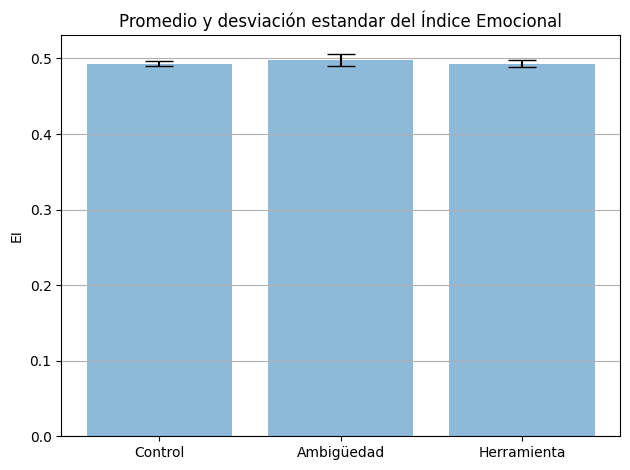

In [207]:
# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('EI')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Promedio y desviación estandar del Índice Emocional')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('promedio_sd_EI_BN2.png')
plt.show()

### BIBLIOGRAFÍA

### cvx EDA

https://github.com/lciti/cvxEDA

### spMatrix: Sparse Matrix Constructor From Triplet

### numpy.tile(arr, repetitions)

The numpy.tile() function constructs a new array by repeating array – ‘arr’, the number of times we want to repeat as per repetitions.

### np.convolve
The convolution operator is often seen in signal processing, where it models the effect of a linear time-invariant system on a signal. In probability theory, the sum of two independent random variables is distributed according to the convolution of their individual distributions.

https://numpy.org/doc/stable/reference/generated/numpy.convolve.html

### np.c  / np.r
The strings ‘r’ or ‘c’ result in matrix output. If the result is 1-D and ‘r’ is specified a 1 x N (row) matrix is produced. If the result is 1-D and ‘c’ is specified, then a N x 1 (column) matrix is produced. If the result is 2-D then both provide the same matrix result.

###  cv.solvers.options.


### cv.sparse

###  cv.solvers.conelp

### numpy.ravel(a, order='C')

Return a contiguous flattened array.



https://cvxopt.org/

https://programmerclick.com/article/5617538313/#:~:text=La%20normalizaci%C3%B3n%20generalmente%20asigna%20los%20datos%20a%20%5B0%2C1%5D%2C,MaxAbsScaler%20en%20Python%2C%20respectivamente.%20MinMaxScaler%3A%20normalizado%20a%20%5B0%2C1%5D

https://datagy.io/python-z-score/ 

https://docs.scipy.org/doc/scipy/tutorial/stats.html

https://numpy.org/doc/stable/reference/generated/numpy.ravel.html

https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.07-Error-Bars/